In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install bluecast

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Library Tools and Packages

In [146]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats
import dtale

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# General Analysis

In [147]:
data = pd.read_csv("riceClassification.csv")
data

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
0          1  4537        92.229316        64.012769      0.719916   
1          2  2872        74.691881        51.400454      0.725553   
2          3  3048        76.293164        52.043491      0.731211   
3          4  3073        77.033628        51.928487      0.738639   
4          5  3693        85.124785        56.374021      0.749282   
...      ...   ...              ...              ...           ...   
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
0            4677      76.004525  0.657536    273.085   0.764510   
1            3015      60.471018  0.713009    208.317   0.831658   
2            3132      62.296341  0.759153    210.012   0.868434   
3            3157      62.551300  0.783529    210.657   0.870203   
4            3802      68.571668  0.769375    230.332   0.874743   
...           ...            ...       ...        ...        ...   
18180        6008      86.326537  0.498594    332.960   0.663444   
18181        7806      98.272692  0.647461    385.506   0.641362   
18182        6531      90.023162  0.561287    342.253   0.682832   
18183        6189      87.112041  0.492399    343.371   0.635227   
18184        6283      88.374495  0.489975    338.613   0.672274   

       AspectRation  Class  
0          1.440796      1  
1          1.453137      1  
2          1.465950      1  
3          1.483456      1  
4          1.510000      1  
...             ...    ...  
18180      2.912535      0  
18181      2.916910      0  
18182      2.925396      0  
18183      2.941216      0  
18184      2.967245      0  

[18185 rows x 12 columns]

In [148]:
data.shape

(18185, 12)

In [149]:
data.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [7]:
data.tail()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
18180        6008      86.326537  0.498594    332.960   0.663444   
18181        7806      98.272692  0.647461    385.506   0.641362   
18182        6531      90.023162  0.561287    342.253   0.682832   
18183        6189      87.112041  0.492399    343.371   0.635227   
18184        6283      88.374495  0.489975    338.613   0.672274   

       AspectRation  Class  
18180      2.912535      0  
18181      2.916910      0  
18182      2.925396      0  
18183      2.941216      0  
18184      2.967245      0

In [8]:
data.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [11]:
data_one = data.copy
data = data.drop(labels='id',axis=1)

In [150]:
data.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      56.666658      0.383239    197.015000   
25%        0.891617   6125.000000      87.126656      0.538530    333.990000   
50%        0.923259   6843.000000      92.085696      0.601194    353.088000   
75%        0.941372   8645.000000     103.559146      0.695664    373.003000   
max        0.966774  11008.000000     114.016559      0.886573    508.511000   

          Roundness  AspectRation         Class  
count  18185.000000  18185.000000  18185.000000  
mean       0.707998      2.599081      0.549079  
std        0.067310      0.434836      0.497599  
min        0.174590      1.358128      0.000000  
25%        0.650962      2.208527      0.000000  
50%        0.701941      2.602966      1.000000  
75%        0.769280      2.964101      1.000000  
max        0.904748      3.911845      1.000000

In [13]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [14]:
data['Class'].value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

# Data Splitting

In [151]:
Y  = data['Class']
X = data.drop('Class',axis=1)

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [153]:
X_train.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
723      724  5435       134.395407        52.681930      0.919969   
1274    1275  5950       142.574525        53.696529      0.926368   
10672  10673  5878       162.359964        47.186511      0.956836   
1954    1955  5786       143.581125        52.658820      0.930318   
3239    3240  5515       141.829041        50.283875      0.935041   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
723          5607      83.186880  0.524969    311.995   0.701640      2.551072  
1274         6043      87.038930  0.549096    321.265   0.724436      2.655191  
10672        6083      86.510705  0.418780    358.343   0.575230      3.440813  
1954         5943      85.831020  0.809231    327.978   0.675926      2.726630  
3239         5616      83.796874  0.490877    317.680   0.686714      2.820567

In [18]:
train_set = pd.concat([X_train,Y_train],axis=1)
train_set

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
723     5435       134.395407        52.681930      0.919969        5607   
1274    5950       142.574525        53.696529      0.926368        6043   
10672   5878       162.359964        47.186511      0.956836        6083   
1954    5786       143.581125        52.658820      0.930318        5943   
3239    5515       141.829041        50.283875      0.935041        5616   
...      ...              ...              ...           ...         ...   
9372    6532       166.236132        51.421649      0.950955        6720   
7291    6377       159.218398        51.986057      0.945194        6565   
17728  10131       176.412300        73.691878      0.908573       10402   
7293    5607       148.440743        48.463357      0.945203        5722   
17673   8947       165.893285        69.534678      0.907916        9166   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
723        83.186880  0.524969    311.995   0.701640      2.551072      1  
1274       87.038930  0.549096    321.265   0.724436      2.655191      1  
10672      86.510705  0.418780    358.343   0.575230      3.440813      1  
1954       85.831020  0.809231    327.978   0.675926      2.726630      1  
3239       83.796874  0.490877    317.680   0.686714      2.820567      1  
...              ...       ...        ...        ...           ...    ...  
9372       91.196495  0.551224    369.082   0.602574      3.232804      1  
7291       90.107983  0.616970    354.079   0.639184      3.062713      1  
17728     113.574600  0.612774    416.495   0.733910      2.393918      0  
7293       84.492924  0.460799    329.340   0.649608      3.062948      1  
17673     106.731786  0.650218    388.012   0.746787      2.385763      0  

[14548 rows x 11 columns]

In [19]:
test_set = pd.concat([X_test,Y_test],axis=1)
test_set

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
777    6512       147.534740        57.464027      0.921029        6685   
2038   6314       149.633460        54.744096      0.930672        6466   
7009   6784       164.349722        53.949120      0.944588        7025   
15967  9163       164.132165        72.350887      0.897601        9486   
7870   5199       144.901586        46.700824      0.946640        5369   
...     ...              ...              ...           ...         ...   
11204  8489       151.655045        72.418507      0.878620        8728   
8942   6260       161.376137        50.609601      0.949551        6556   
13572  7420       145.041079        66.336343      0.889280        7713   
16575  9283       165.756310        72.162465      0.900260        9510   
2075   6897       156.853002        57.311684      0.930857        7068   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
777        91.056773  0.805442    338.754   0.713108      2.567428      1  
2038       89.661778  0.799544    338.588   0.692104      2.733326      1  
7009       92.938997  0.561171    368.908   0.626411      3.046384      1  
15967     108.012471  0.648478    392.486   0.747479      2.268558      0  
7870       81.360755  0.501108    320.181   0.637292      3.102763      1  
...              ...       ...        ...        ...           ...    ...  
11204     103.964083  0.589678    375.653   0.755949      2.094148      0  
8942       89.277542  0.462470    362.129   0.599871      3.188647      1  
13572      97.197929  0.606209    353.088   0.747907      2.186450      0  
16575     108.717444  0.639854    398.483   0.734647      2.296988      0  
2075       93.709835  0.634090    356.213   0.683047      2.736842      1  

[3637 rows x 11 columns]

# Outlier Analysis 

## DB-SCAN 


In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [21]:
X_train_copy = X_train.copy()
X = StandardScaler().fit_transform(X_train_copy.values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [22]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of clusters in dataset is:', n_clusters_)

The number of clusters in dataset is: 1


In [23]:
pd.Series(labels).value_counts()

 0    14542
-1        6
Name: count, dtype: int64

In [24]:
outlier_count = (labels == -1).sum()
total_points = len(labels)
outlier_percentage = (outlier_count / total_points) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 0.04%


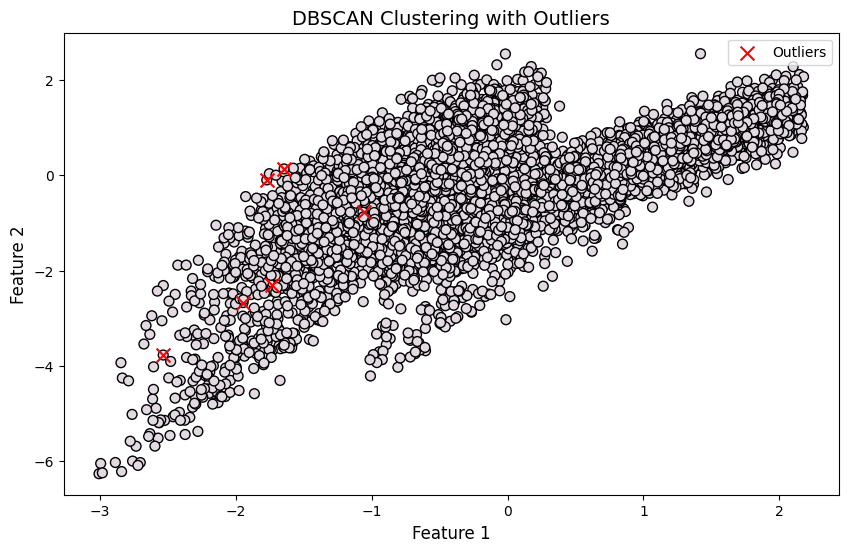

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='twilight', marker='o', edgecolor='k', s=50)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='red', label='Outliers', marker='x', s=100)

plt.title('DBSCAN Clustering with Outliers', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

plt.legend()
plt.show()

#  Mahalanobis Distance

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def mahalanobis_distances(X):
    mean = np.mean(X, axis=0)
    cov_matrix = np.cov(X.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    diffs = X - mean
    distances = np.sqrt(np.diag(diffs.dot(inv_cov_matrix).dot(diffs.T)))
    return distances

distances = mahalanobis_distances(X_train_copy.values)


threshold = chi2.ppf(0.975, X_train_copy.shape[1])  # 97.5% quantile with degrees of freedom = number of variables

outliers = distances > threshold

outlier_count = np.sum(outliers)
total_count = len(X_train_copy)
outlier_percentage = (outlier_count / total_count) * 100

print(f"Threshold for outliers: {threshold:.2f}")
print(f"Number of outliers: {outlier_count}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

outlier_data = X_train_copy[outliers]
outlier_data

Threshold for outliers: 20.48
Number of outliers: 12
Percentage of outliers: 0.08%


Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
172    3320       104.957985        50.875027      0.874670        4375   
295    4179       118.582300        52.066166      0.898452        5019   
18065  6303       143.550166        57.109851      0.917455        6963   
8      2629        74.133114        48.074144      0.761228        2790   
326    4491       123.037093        52.897323      0.902862        5426   
17553  6908       152.113528        64.189376      0.906604        7821   
2407   5476       142.169713        51.489479      0.932112        6178   
1      2872        74.691881        51.400454      0.725553        3015   
11166  4434       150.442219        41.478578      0.961241        5661   
10896  4620       153.288068        43.598410      0.958699        5603   
10609  5335       158.877815        46.388546      0.956426        6206   
2      3048        76.293164        52.043491      0.731211        3132   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
172        65.016577  0.409927    488.837   0.174590      2.063055  
295        72.944281  0.418947    448.305   0.261297      2.277531  
18065      89.583642  0.616491    459.759   0.374711      2.513580  
8          57.856260  0.640595    207.325   0.768594      1.542058  
326        75.618244  0.535983    434.235   0.299298      2.325961  
17553      93.784534  0.528700    476.522   0.382293      2.369762  
2407       83.500058  0.517287    508.511   0.266117      2.761141  
1          60.471018  0.713009    208.317   0.831658      1.453137  
11166      75.136836  0.421964    421.126   0.314182      3.626986  
10896      76.696589  0.500325    442.959   0.295886      3.515910  
10609      82.418038  0.527330    428.305   0.365458      3.424936  
2          62.296341  0.759153    210.012   0.868434      1.465950

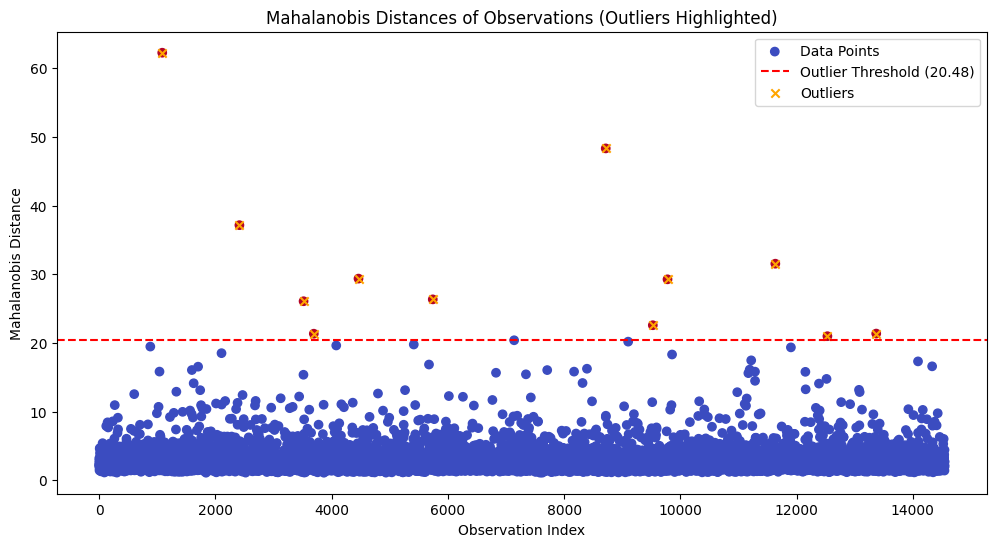

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(distances)), distances, c=outliers, cmap="coolwarm", label="Data Points")
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Outlier Threshold ({threshold:.2f})')

plt.scatter(np.where(outliers)[0], distances[outliers], color='orange', label="Outliers", marker='x')
plt.title("Mahalanobis Distances of Observations (Outliers Highlighted)")
plt.xlabel("Observation Index")
plt.ylabel("Mahalanobis Distance")
plt.legend(loc="upper right")
plt.show()

# Overview Visualizations


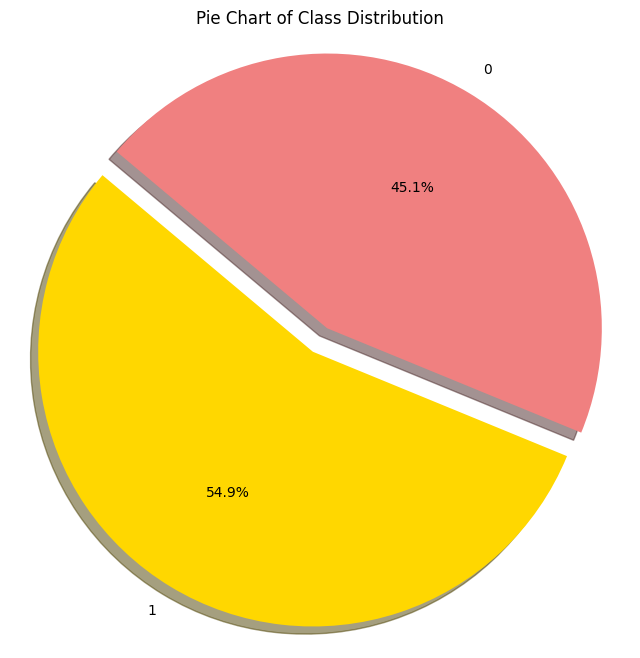

In [28]:
class_counts = data['Class'].value_counts()
labels = class_counts.index
sizes = class_counts.values
colors = ['gold', 'lightcoral']  
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Title and display
plt.title('Pie Chart of Class Distribution')
plt.axis('equal') 
plt.show()

E:\applications\py\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\applications\py\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

E:\applications\py\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

E:\applications\py\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

E:\applications\py\lib\site-packages\seaborn\_oldcore.py:107

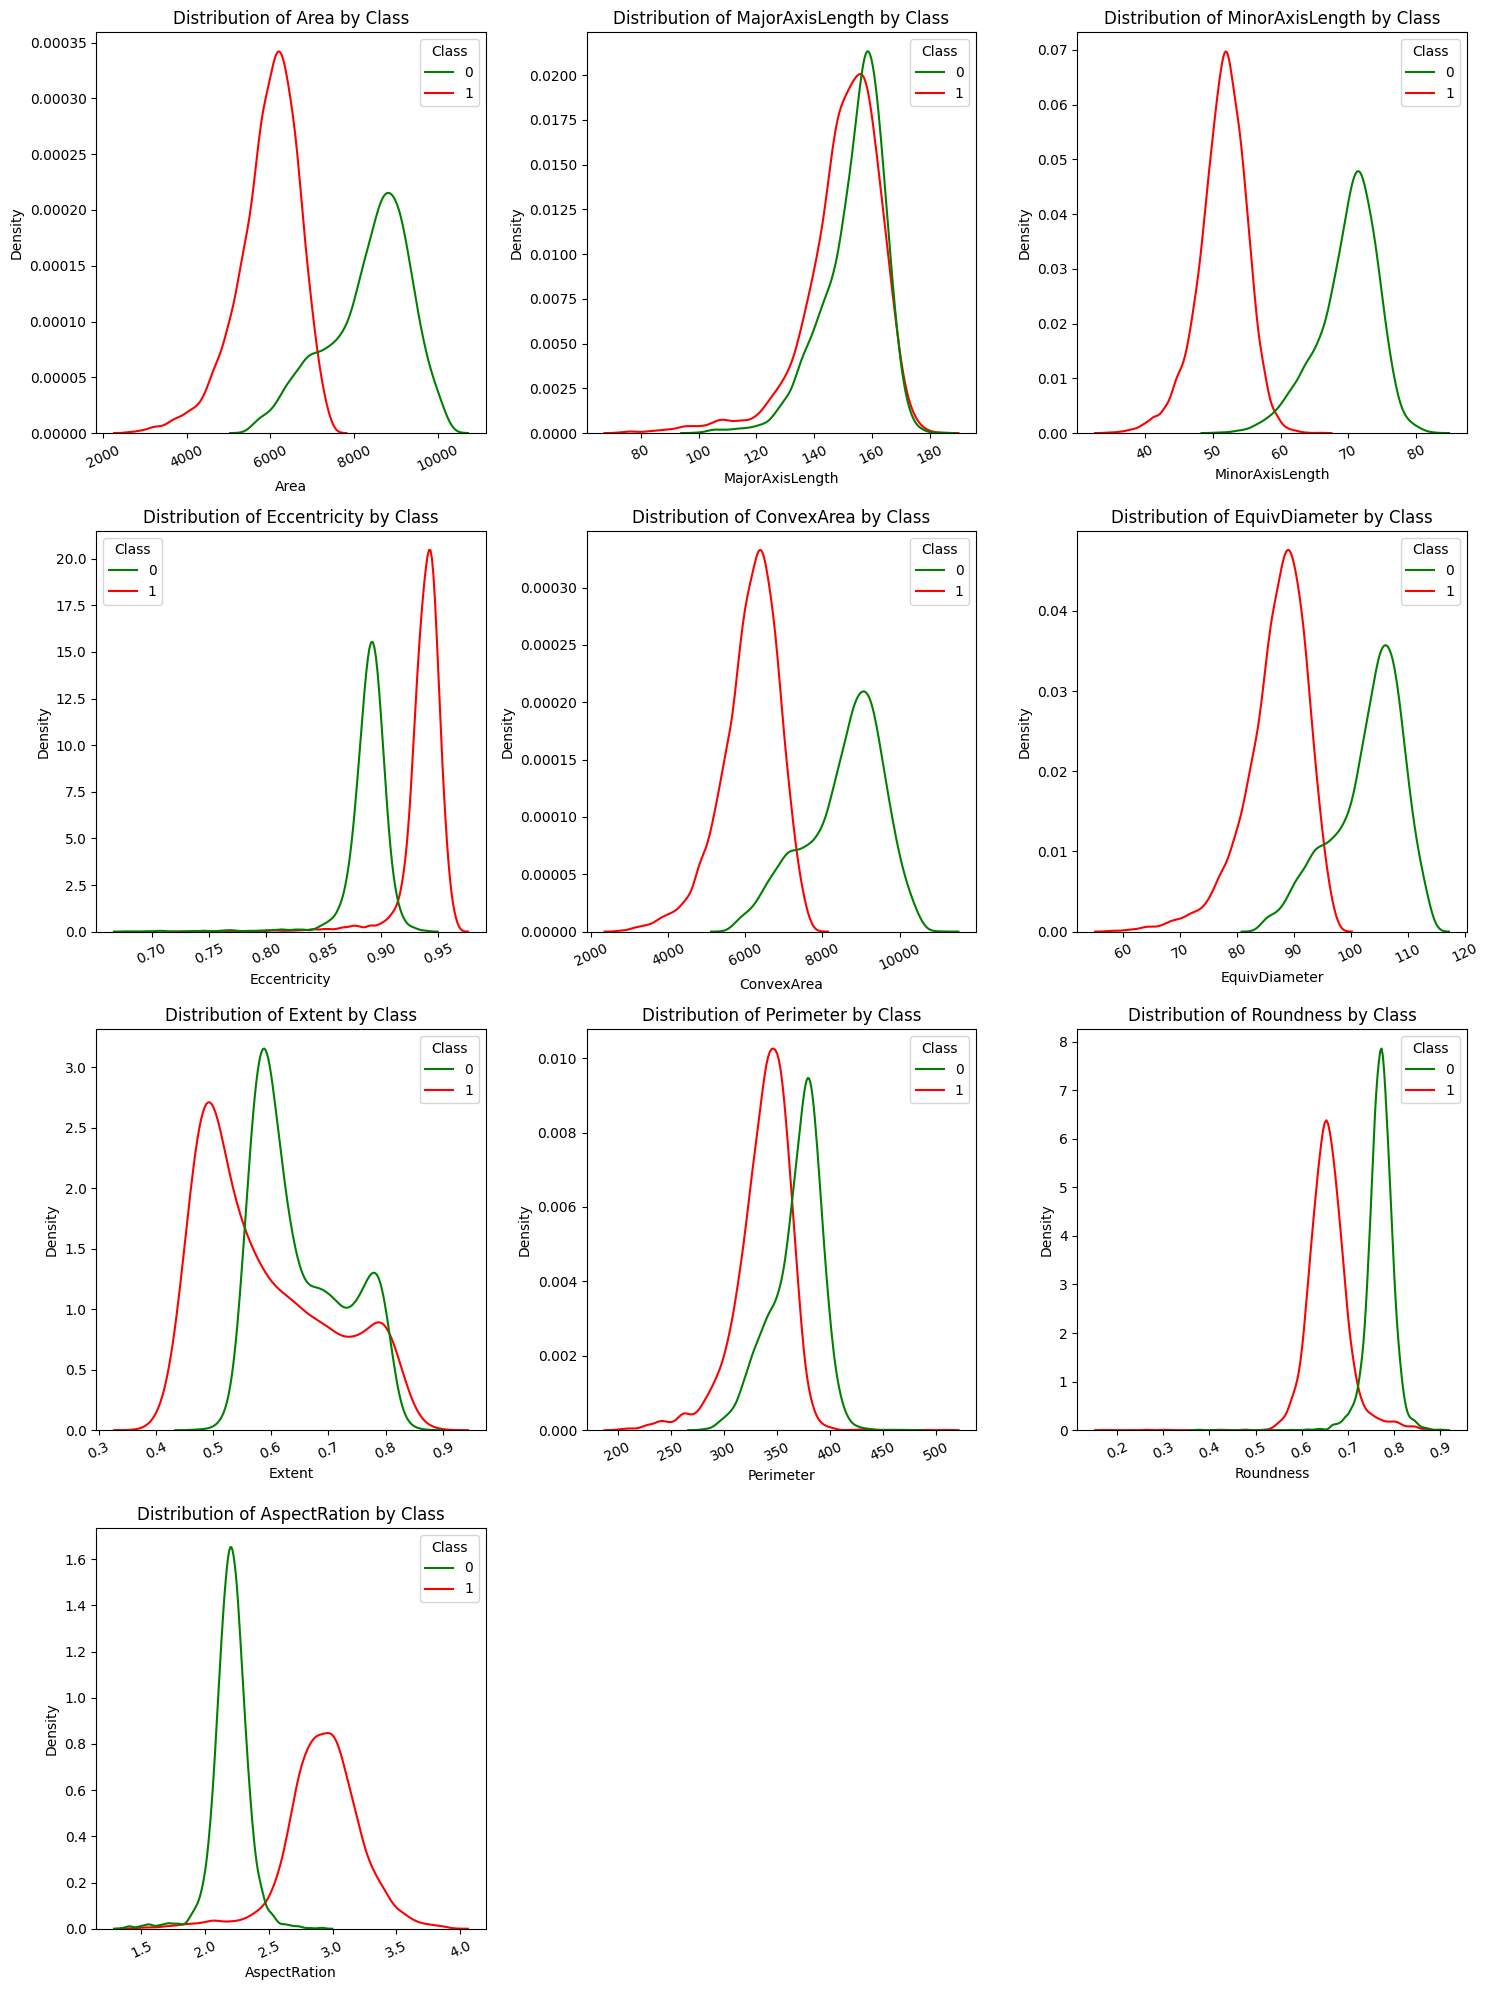

In [29]:
num_cols = X_train_copy.shape[1]
num_rows = int(np.ceil(num_cols / 3))

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
ax = ax.flatten()

palette = {0: 'green', 1: 'red'}

for i, col in enumerate(X_train_copy.columns):
    sns.kdeplot(data=X_train_copy, x=col, hue=Y_train, palette=palette, ax=ax[i])
    ax[i].set_title(f"Distribution of {col} by Class")  
    ax[i].tick_params(axis='x', rotation=25)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [30]:

from bluecast.eda.analyse import (
    plot_pie_chart,
    plot_count_pairs,
    bi_variate_plots,
    correlation_heatmap,
    correlation_to_target,
    plot_pca,
    plot_pca_cumulative_variance,
    plot_theil_u_heatmap,
    plot_tsne,
    univariate_plots,
    check_unique_values,
    plot_null_percentage,
    mutual_info_to_target )

In [31]:
from bluecast.preprocessing.feature_types import FeatureTypeDetector

In [32]:
ignore_cols = []

f_type_detector = FeatureTypeDetector()
data = f_type_detector.fit_transform_feature_types(train_set.drop(ignore_cols, axis=1))

print("num_data", len(f_type_detector.num_columns))
print("cat_data", len(f_type_detector.cat_columns))

num_data 11
cat_data 0


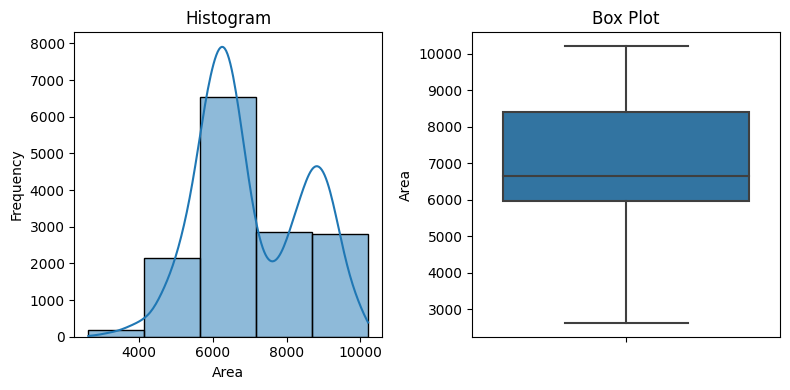

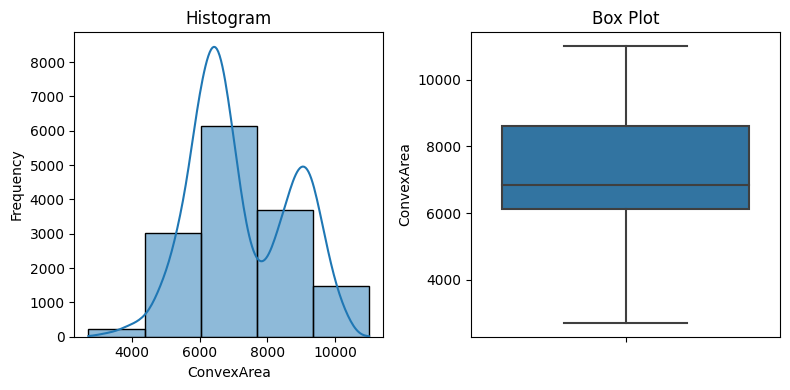

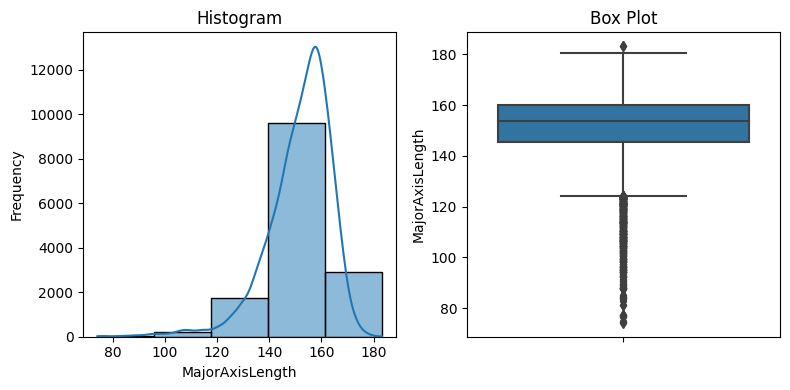

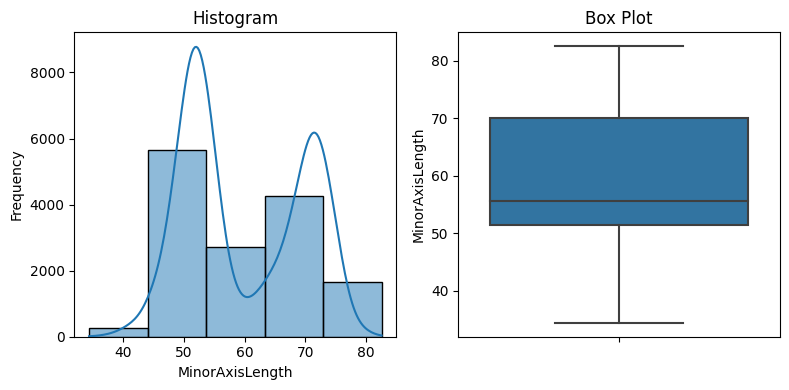

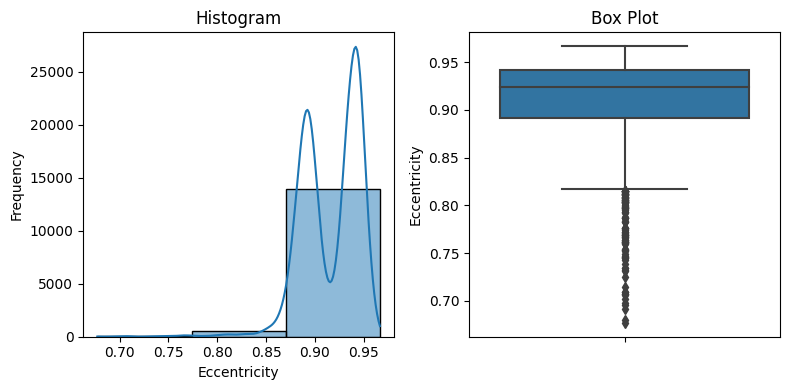

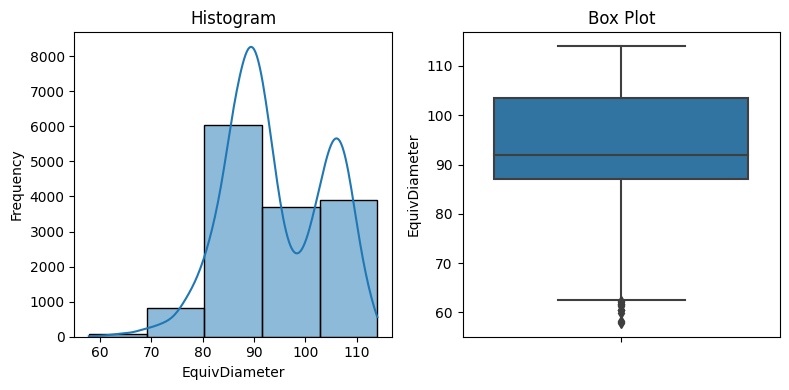

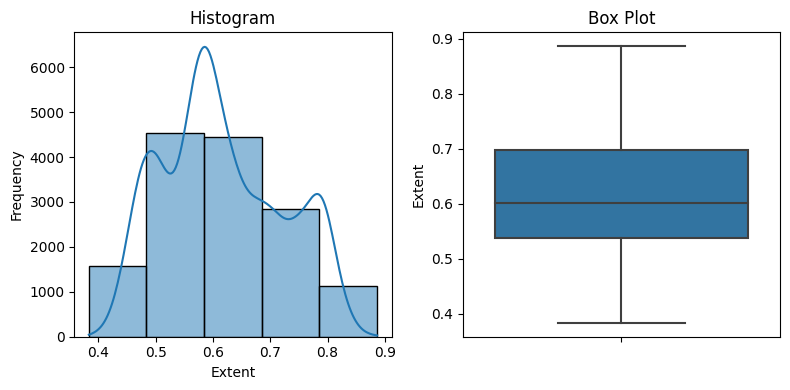

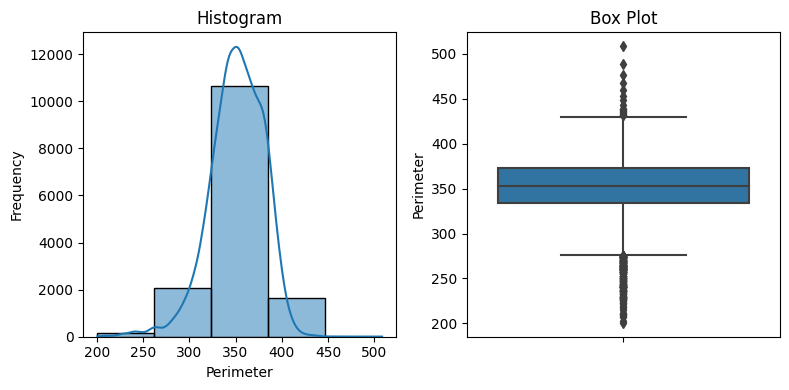

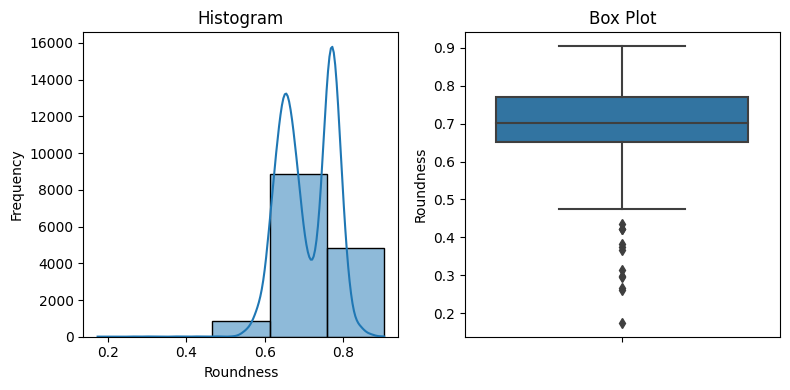

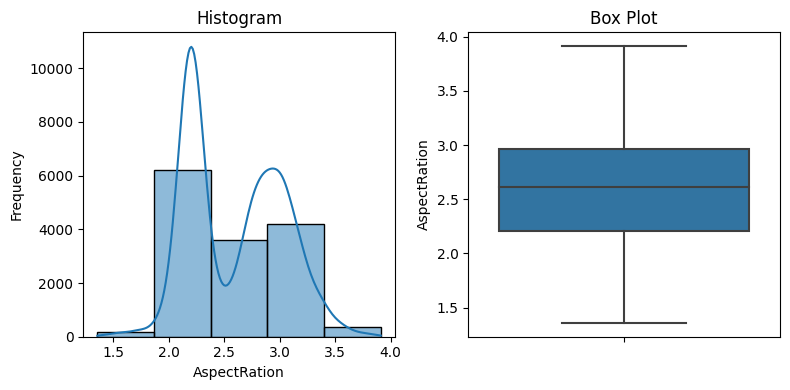

In [33]:
univariate_plots(
        data.loc[:, f_type_detector.num_columns]
    )

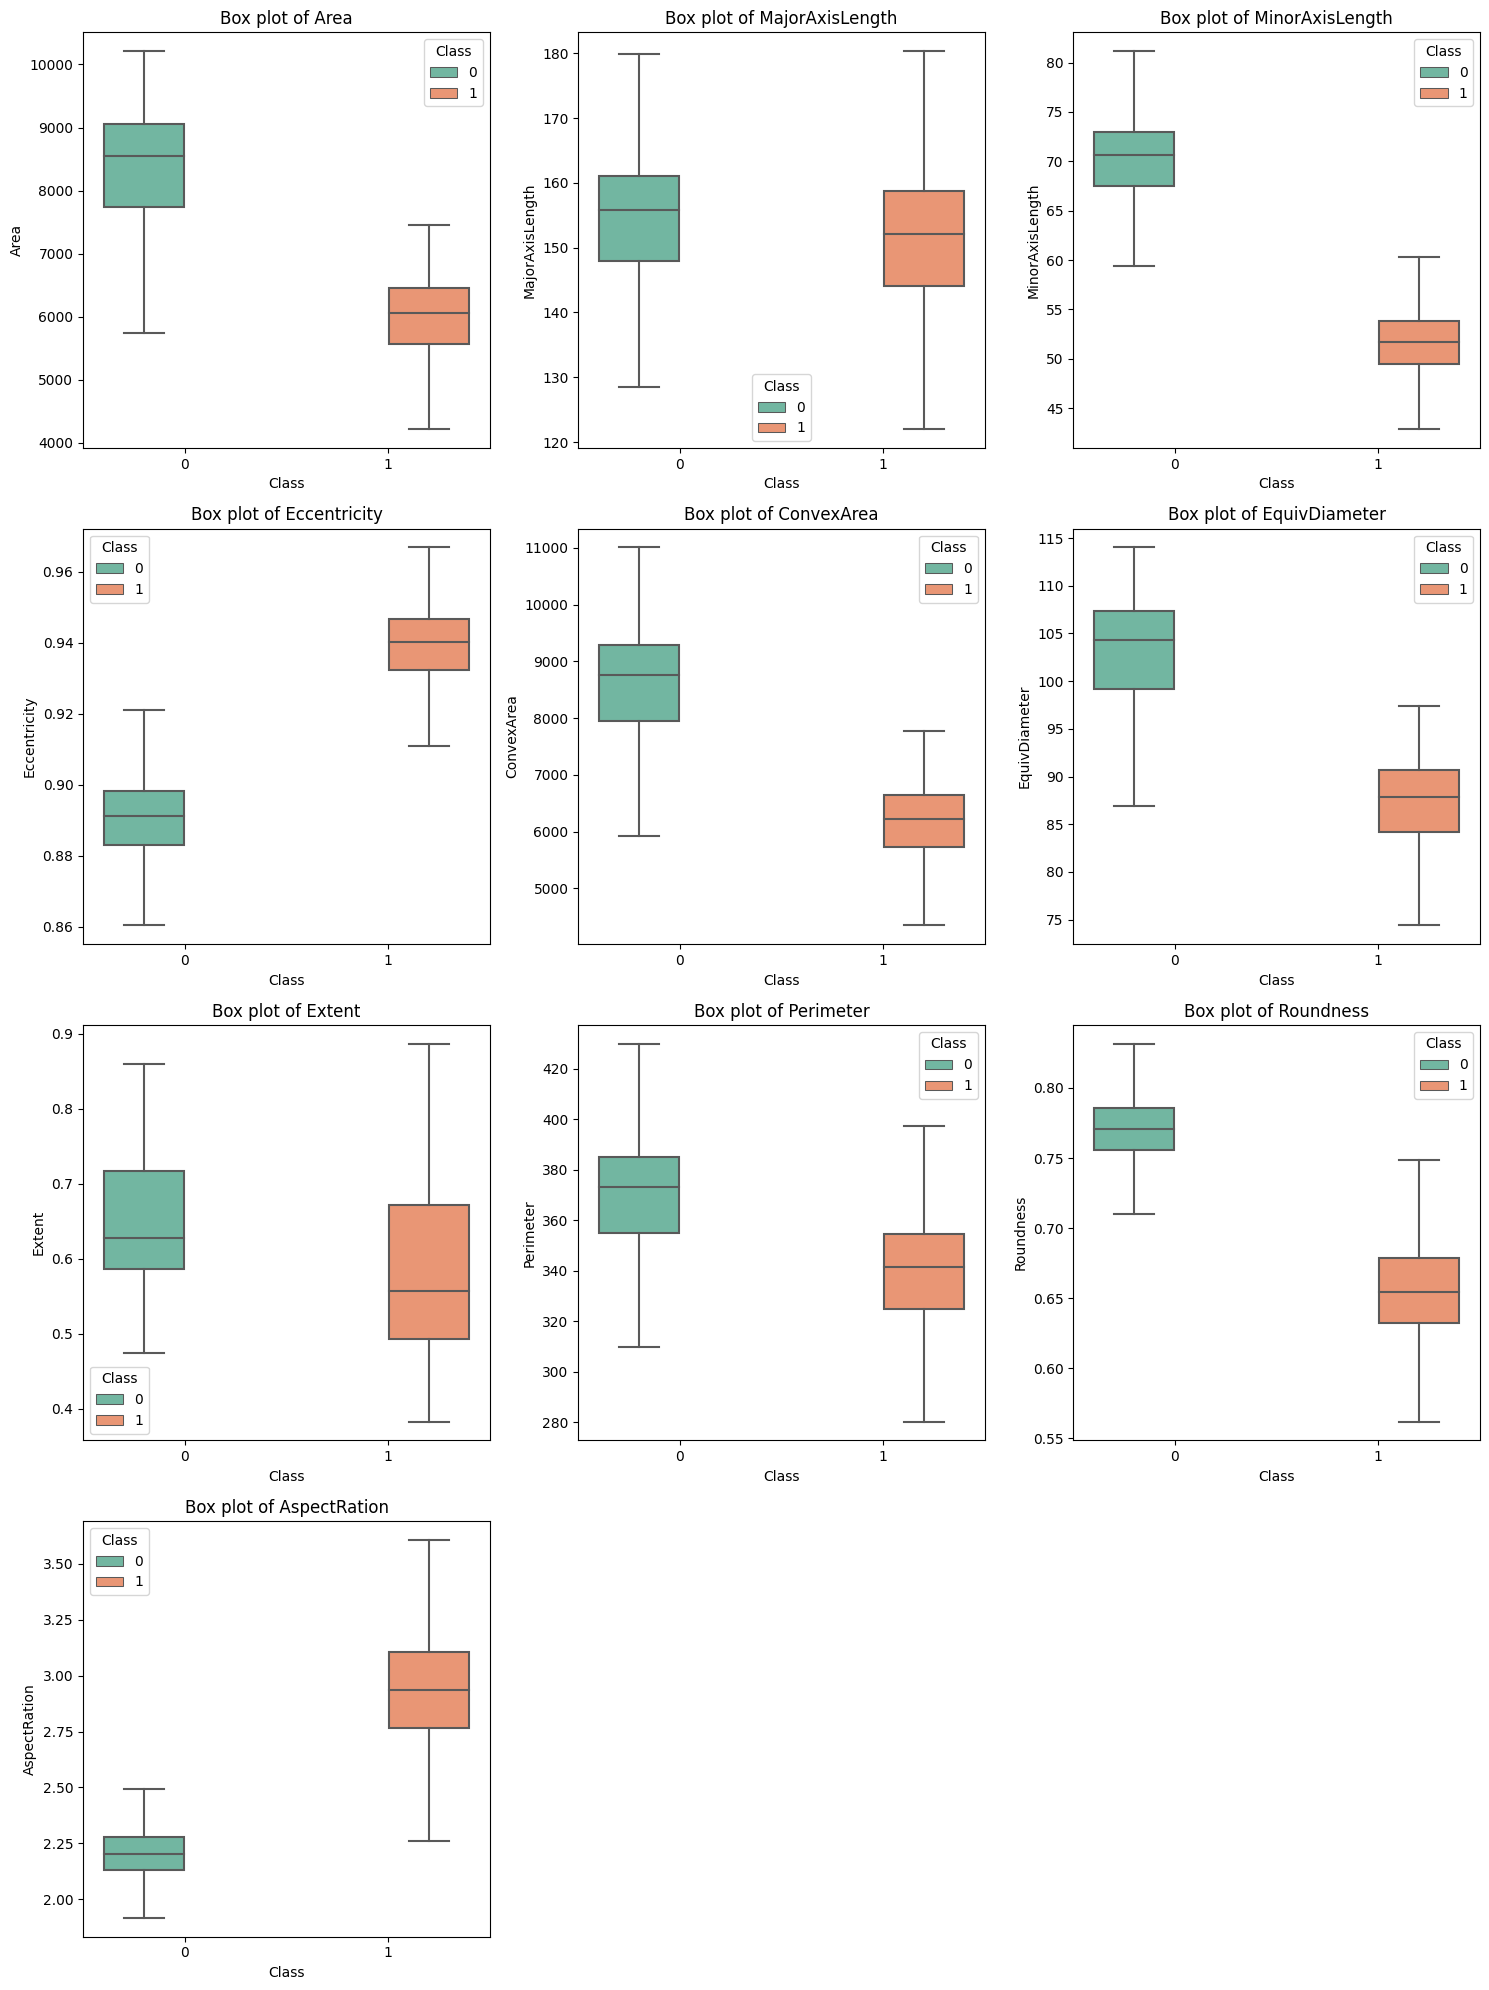

In [34]:
num_cols = X_train.shape[1]
num_rows = int(np.ceil(num_cols / 3))

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
ax = ax.flatten()

hue_order = [0,1]


for idx, col in enumerate(X_train.columns):
    sns.boxplot(
        ax=ax[idx], 
        x=train_set['Class'], 
        y=train_set[col], 
        hue=train_set['Class'], 
        hue_order=hue_order, 
        palette="Set2",
        showfliers=False  # This hides the outliers in the box plot
    )
    ax[idx].set_title(f'Box plot of {col}')
    ax[idx].legend(title='Class')
    
# Remove unused subplots if any
for i in range(len(X_train.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

# DTALE

In [35]:
#dtale.show(train_set)

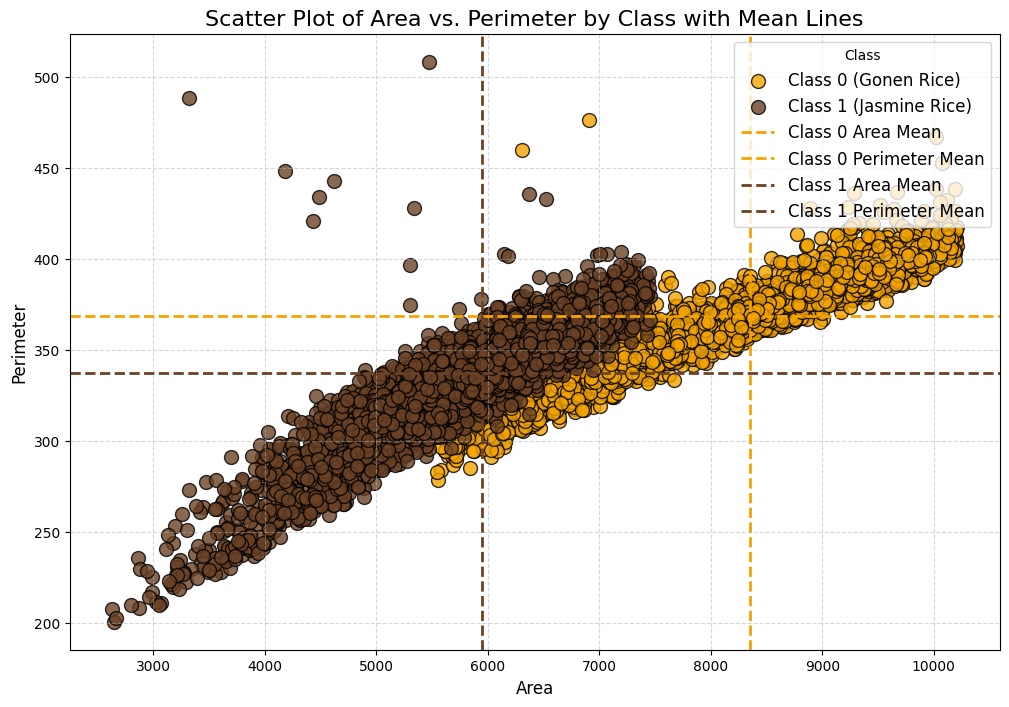

In [36]:
plt.figure(figsize=(12, 8))

# Separate data by class for plotting
class_0_points = train_set[train_set['Class'] == 0][['Area', 'Perimeter']].values
class_1_points = train_set[train_set['Class'] == 1][['Area', 'Perimeter']].values

# Calculate means for each class
mean_area_class_0 = np.mean(class_0_points[:, 0])
mean_perimeter_class_0 = np.mean(class_0_points[:, 1])
mean_area_class_1 = np.mean(class_1_points[:, 0])
mean_perimeter_class_1 = np.mean(class_1_points[:, 1])

# Scatter plot with clearer, distinct rice-inspired colors for each class
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], s=100, color='#F4A300', label='Class 0 (Gonen Rice)', alpha=0.8, edgecolor='black')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], s=100, color='#6B4226', label='Class 1 (Jasmine Rice)', alpha=0.8, edgecolor='black')

# Plot mean lines for each feature and class with dashed lines
plt.axvline(mean_area_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 Area Mean")
plt.axhline(mean_perimeter_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 Perimeter Mean")
plt.axvline(mean_area_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 Area Mean")
plt.axhline(mean_perimeter_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 Perimeter Mean")

# Add title, labels, and legend
plt.title('Scatter Plot of Area vs. Perimeter by Class with Mean Lines', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Perimeter', fontsize=12)
plt.legend(title='Class', loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Optional grid for clarity

# Show plot
plt.show()

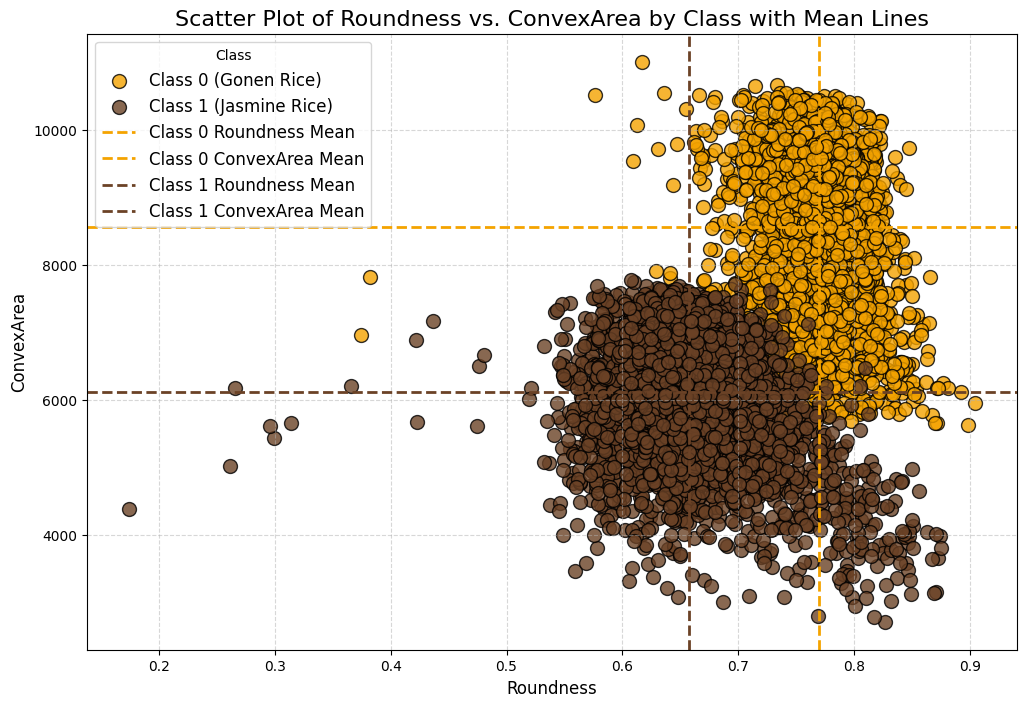

In [37]:
plt.figure(figsize=(12, 8))

# Separate data by class for plotting
class_0_points = train_set[train_set['Class'] == 0][['Roundness', 'ConvexArea']].values
class_1_points = train_set[train_set['Class'] == 1][['Roundness', 'ConvexArea']].values

# Calculate means for each class
mean_roundness_class_0 = np.mean(class_0_points[:, 0])
mean_convexarea_class_0 = np.mean(class_0_points[:, 1])
mean_roundness_class_1 = np.mean(class_1_points[:, 0])
mean_convexarea_class_1 = np.mean(class_1_points[:, 1])

# Scatter plot with clearer, distinct rice-inspired colors for each class
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], s=100, color='#F4A300', label='Class 0 (Gonen Rice)', alpha=0.8, edgecolor='black')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], s=100, color='#6B4226', label='Class 1 (Jasmine Rice)', alpha=0.8, edgecolor='black')

# Plot mean lines for each feature and class with dashed lines
plt.axvline(mean_roundness_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 Roundness Mean")
plt.axhline(mean_convexarea_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 ConvexArea Mean")
plt.axvline(mean_roundness_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 Roundness Mean")
plt.axhline(mean_convexarea_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 ConvexArea Mean")

# Add title, labels, and legend (moved to upper left)
plt.title('Scatter Plot of Roundness vs. ConvexArea by Class with Mean Lines', fontsize=16)
plt.xlabel('Roundness', fontsize=12)
plt.ylabel('ConvexArea', fontsize=12)
plt.legend(title='Class', loc='upper left', fontsize=12)  # Moved legend to upper left
plt.grid(True, linestyle='--', alpha=0.5)  # Optional grid for clarity

# Show plot
plt.show()

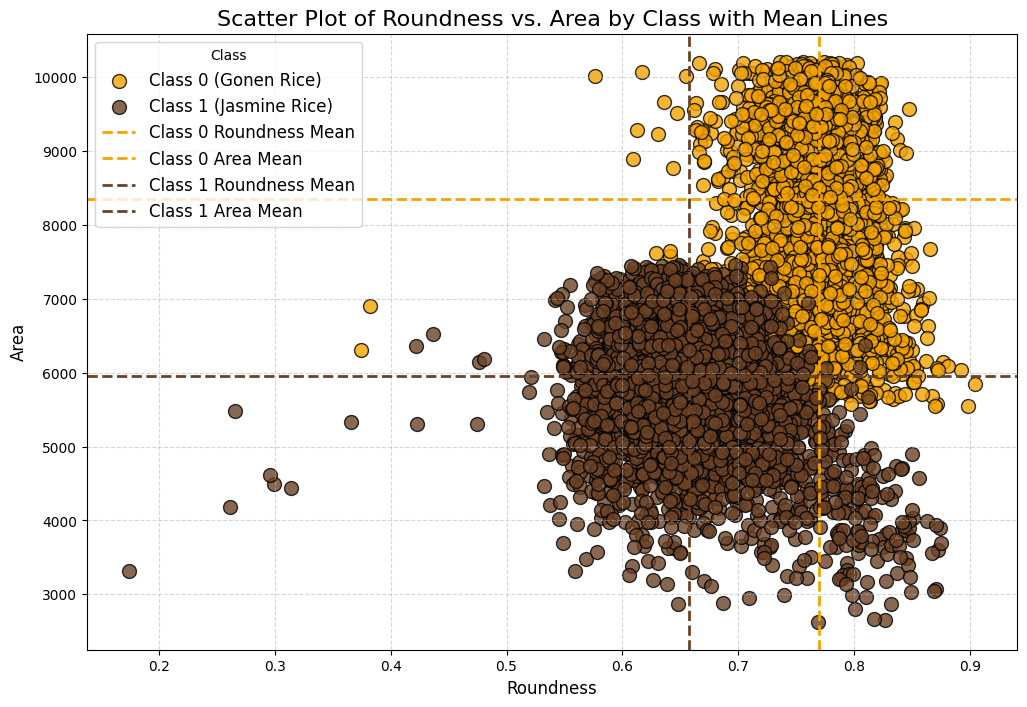

In [38]:
plt.figure(figsize=(12, 8))

# Separate data by class for plotting
class_0_points = train_set[train_set['Class'] == 0][['Roundness', 'Area']].values
class_1_points = train_set[train_set['Class'] == 1][['Roundness', 'Area']].values

# Calculate means for each class
mean_roundness_class_0 = np.mean(class_0_points[:, 0])
mean_convexarea_class_0 = np.mean(class_0_points[:, 1])
mean_roundness_class_1 = np.mean(class_1_points[:, 0])
mean_convexarea_class_1 = np.mean(class_1_points[:, 1])

# Scatter plot with clearer, distinct rice-inspired colors for each class
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], s=100, color='#F4A300', label='Class 0 (Gonen Rice)', alpha=0.8, edgecolor='black')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], s=100, color='#6B4226', label='Class 1 (Jasmine Rice)', alpha=0.8, edgecolor='black')

# Plot mean lines for each feature and class with dashed lines
plt.axvline(mean_roundness_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 Roundness Mean")
plt.axhline(mean_convexarea_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 Area Mean")
plt.axvline(mean_roundness_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 Roundness Mean")
plt.axhline(mean_convexarea_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 Area Mean")

# Add title, labels, and legend (moved to upper left)
plt.title('Scatter Plot of Roundness vs. Area by Class with Mean Lines', fontsize=16)
plt.xlabel('Roundness', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.legend(title='Class', loc='upper left', fontsize=12)  # Moved legend to upper left
plt.grid(True, linestyle='--', alpha=0.5)  # Optional grid for clarity

# Show plot
plt.show()

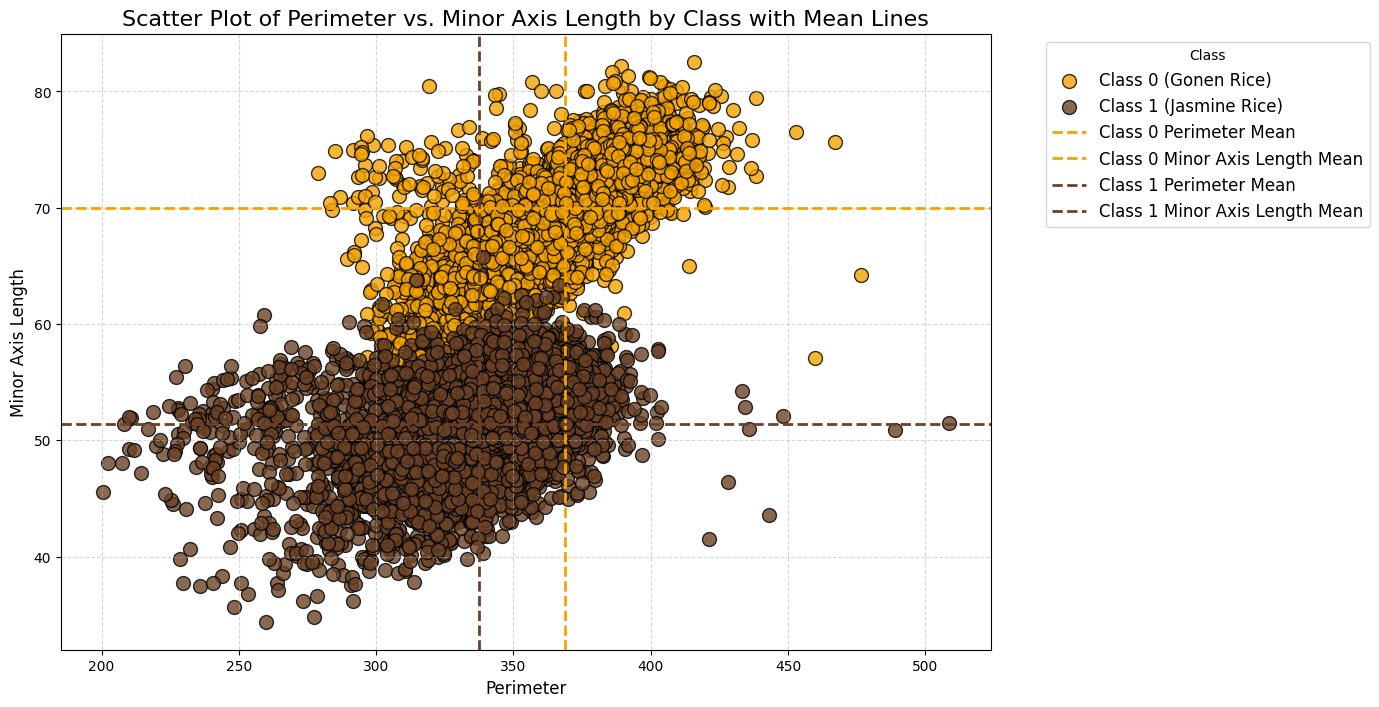

In [39]:
plt.figure(figsize=(12, 8))

# Separate data by class for plotting
class_0_points = train_set[train_set['Class'] == 0][['Perimeter', 'MinorAxisLength']].values
class_1_points = train_set[train_set['Class'] == 1][['Perimeter', 'MinorAxisLength']].values

# Calculate means for each class
mean_perimeter_class_0 = np.mean(class_0_points[:, 0])
mean_minoraxislength_class_0 = np.mean(class_0_points[:, 1])
mean_perimeter_class_1 = np.mean(class_1_points[:, 0])
mean_minoraxislength_class_1 = np.mean(class_1_points[:, 1])

# Scatter plot with clearer, distinct rice-inspired colors for each class
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], s=100, color='#F4A300', label='Class 0 (Gonen Rice)', alpha=0.8, edgecolor='black')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], s=100, color='#6B4226', label='Class 1 (Jasmine Rice)', alpha=0.8, edgecolor='black')

# Plot mean lines for each feature and class with dashed lines
plt.axvline(mean_perimeter_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 Perimeter Mean")
plt.axhline(mean_minoraxislength_class_0, color='#F4A300', linestyle='--', linewidth=2, label="Class 0 Minor Axis Length Mean")
plt.axvline(mean_perimeter_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 Perimeter Mean")
plt.axhline(mean_minoraxislength_class_1, color='#6B4226', linestyle='--', linewidth=2, label="Class 1 Minor Axis Length Mean")

# Add title, labels, and move legend to the right
plt.title('Scatter Plot of Perimeter vs. Minor Axis Length by Class with Mean Lines', fontsize=16)
plt.xlabel('Perimeter', fontsize=12)
plt.ylabel('Minor Axis Length', fontsize=12)
plt.legend(title='Class', loc='upper left', fontsize=12, bbox_to_anchor=(1.05, 1))  # Legend moved to the right
plt.grid(True, linestyle='--', alpha=0.5)  # Optional grid for clarity

# Show plot
plt.show()

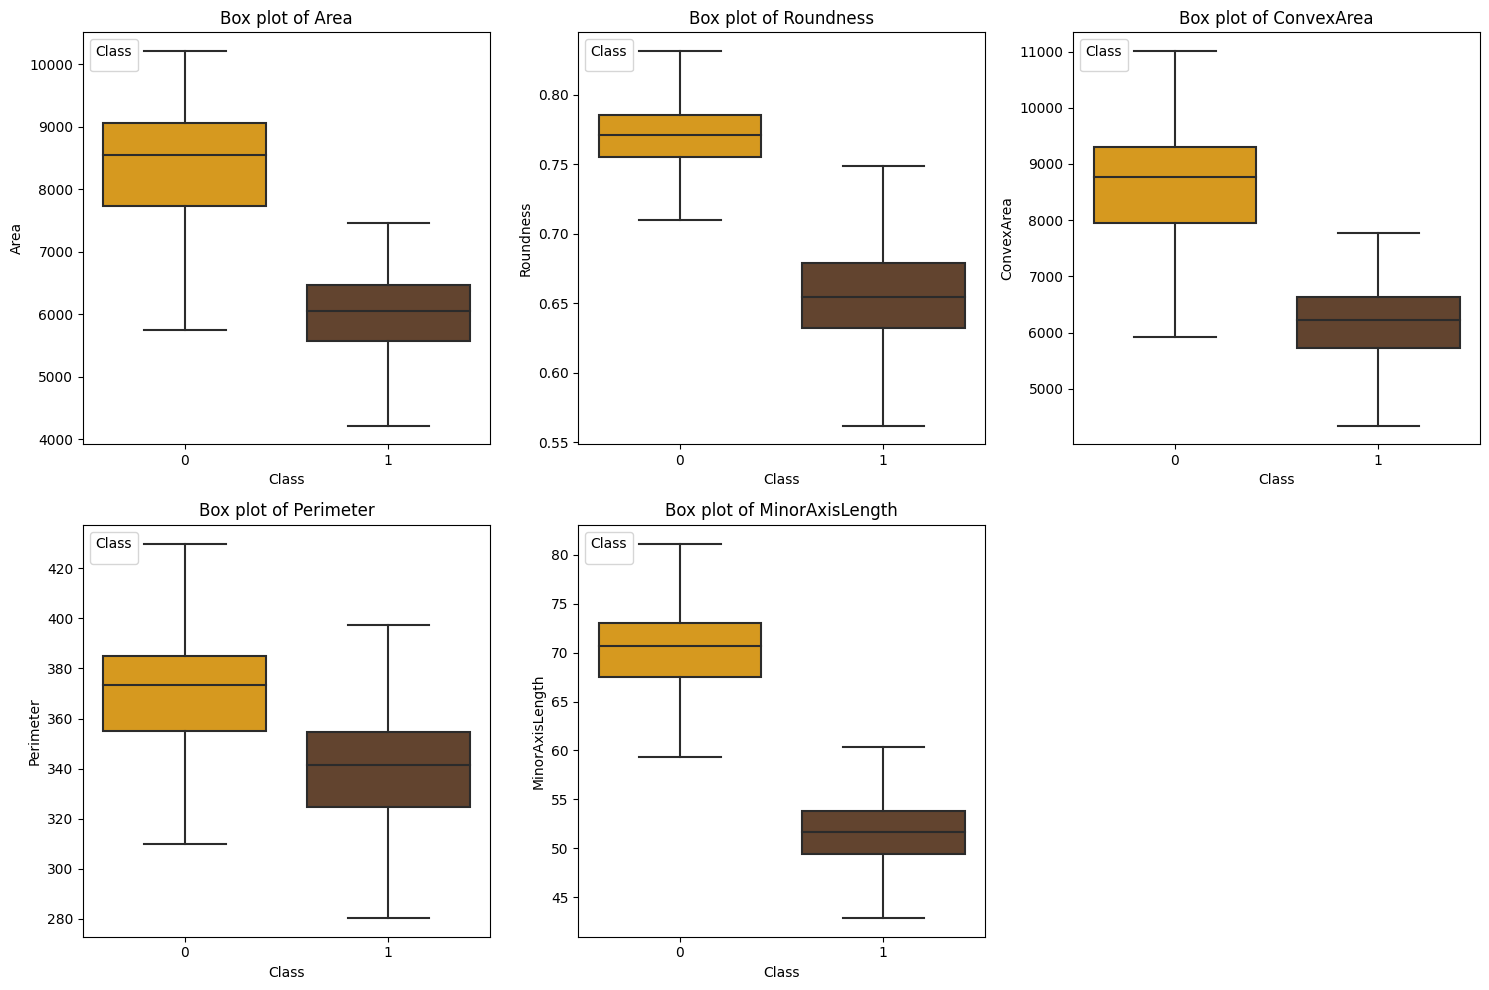

In [40]:
selected_columns = ['Area', 'Roundness', 'ConvexArea', 'Perimeter', 'MinorAxisLength']

# Set up the layout based on the number of selected columns
num_cols = len(selected_columns)
num_rows = int(np.ceil(num_cols / 3))

# Create the subplots
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
ax = ax.flatten()

# Define the color palette similar to your scatter plot
palette = {0: '#F4A300', 1: '#6B4226'}

# Plot boxplots for the selected features
for idx, col in enumerate(selected_columns):
    sns.boxplot(
        ax=ax[idx], 
        x=train_set['Class'], 
        y=train_set[col], 
        palette=palette,  # Custom color palette
        showfliers=False  # This hides the outliers in the box plot
    )
    ax[idx].set_title(f'Box plot of {col}')
    ax[idx].legend(title='Class', loc='upper left')  # Place the legend in the upper left corner

# Remove unused subplots if there are any
for i in range(len(selected_columns), len(ax)):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation Analysis 

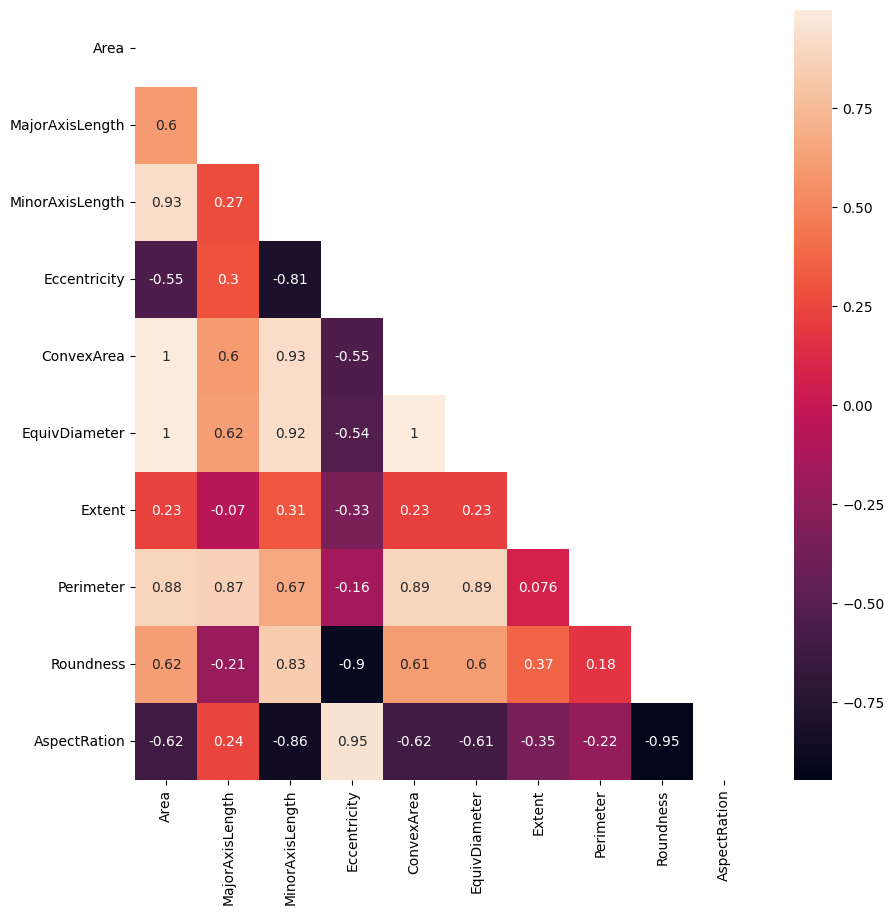

In [41]:
%matplotlib inline
mask = np.triu(np.ones_like(X_train.corr())) 
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True,mask=mask)
plt.show()

<Figure size 400x400 with 0 Axes>

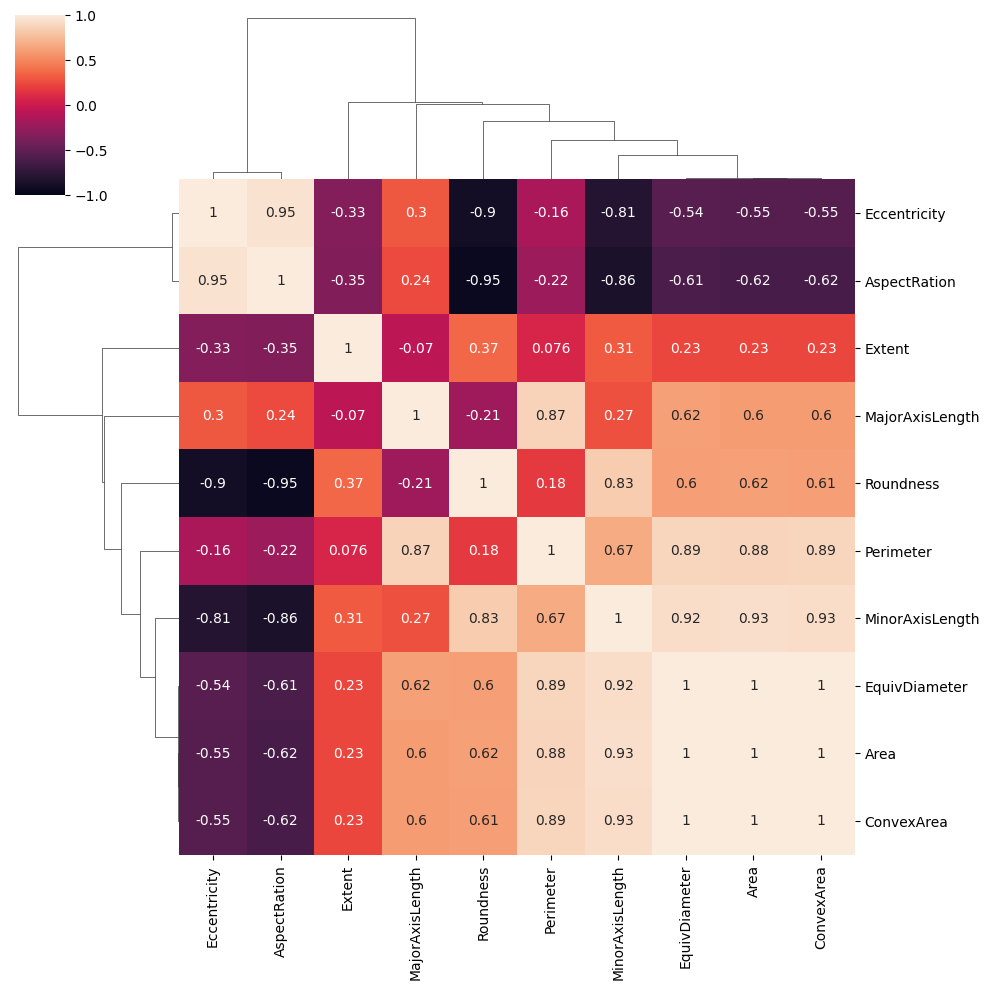

In [42]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(X_train.corr(), vmin = -1, vmax = 1, annot = True)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]

print(vif_data)

           feature            VIF
0             Area   56606.747799
1  MajorAxisLength   48006.743054
2  MinorAxisLength   30779.928698
3     Eccentricity   15063.660109
4       ConvexArea   44101.243665
5    EquivDiameter  199503.608971
6           Extent      41.308519
7        Perimeter   25025.516633
8        Roundness    8561.919556
9     AspectRation    3542.206442


In [44]:
train_set.to_csv('train_set.csv', index=False)

In [45]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

# Standardizing 

In [46]:
predictors = data.drop(columns=['Class'])
response = data['Class']

In [47]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
data_en_s = pd.DataFrame(predictors_scaled, columns=predictors.columns, index=data.index)
data_en_s['Class'] = response 

data_en_s

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
723   -1.087486        -1.394592        -0.703234      0.143527   -1.073624   
1274  -0.735277        -0.733336        -0.601991      0.354381   -0.782324   
10672 -0.784518         0.866254        -1.251602      1.358356   -0.755599   
1954  -0.847437        -0.651956        -0.705540      0.484566   -0.849136   
3239  -1.032774        -0.793606        -0.942527      0.640197   -1.067610   
...         ...              ...              ...           ...         ...   
9372  -0.337247         1.179630        -0.828993      1.164578   -0.330008   
7291  -0.443252         0.612268        -0.772673      0.974757   -0.433566   
17728  2.124111         2.002341         1.393272     -0.231962    2.130005   
7293  -0.969855        -0.259071        -1.124190      0.975042   -0.996790   
17673  1.314373         1.151912         0.978440     -0.253637    1.304211   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
723        -1.101377 -0.876944  -1.338209  -0.089518     -0.116093      1  
1274       -0.711175 -0.646604  -1.023625   0.248904      0.123566      1  
10672      -0.764683 -1.890719   0.234644  -1.966128      1.931905      1  
1954       -0.833533  1.836896  -0.795814  -0.471256      0.288005      1  
3239       -1.039586 -1.202417  -1.145284  -0.311103      0.504228      1  
...              ...       ...        ...        ...           ...    ...  
9372       -0.290025 -0.626288   0.599080  -1.560197      1.453112      1  
7291       -0.400288  0.001388   0.089942  -1.016701      1.061599      1  
17728       1.976816 -0.038665   2.208074   0.389545     -0.477830      0  
7293       -0.969079 -1.489570  -0.749594  -0.861951      1.062139      1  
17673       1.283657  0.318808   1.241483   0.580722     -0.496600      0  

[14548 rows x 11 columns]

In [48]:
Ys  = data_en_s['Class']
Xs = data_en_s.drop('Class',axis=1)

In [49]:
Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(Xs, Ys, test_size=0.2, random_state=10)

In [50]:
train_set_s = pd.concat([Xs_train,Ys_train],axis=1)
test_set_s = pd.concat([Xs_test,Ys_test],axis=1)

# PCA 

In [51]:
from sklearn.decomposition import PCA
pca = PCA(0.9,random_state=10)
Xtr_pca = pca.fit_transform(Xs_train)
Xte_pca = pca.transform(Xs_test)

In [52]:
Xtr_pca.shape 

(11638, 3)

In [53]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.63716412, 0.26140015, 0.08369003])

In [54]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

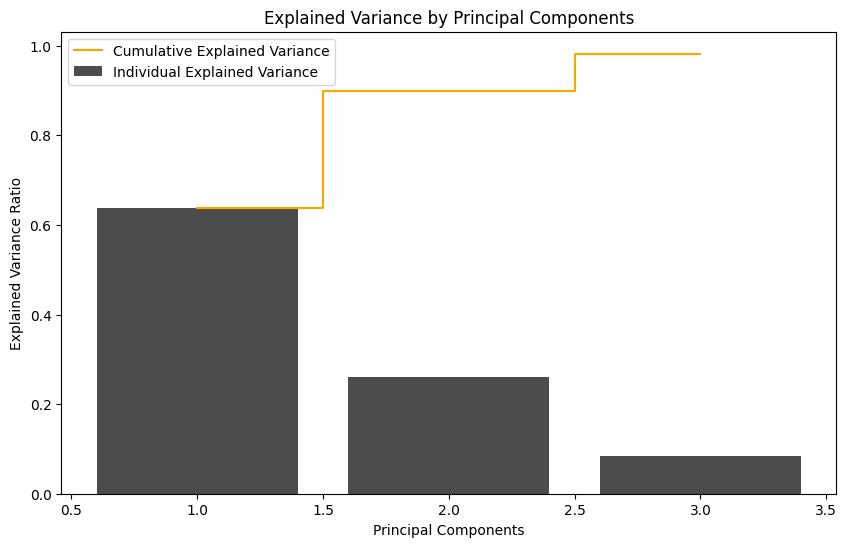

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='black', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='orange', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

In [56]:
component_names_tr = [f"PC{i+1}" for i in range(Xtr_pca.shape[1])]
component_names_te = [f"PC{i+1}" for i in range(Xte_pca.shape[1])]

In [57]:
train_pca = pd.DataFrame(Xtr_pca,columns=component_names_tr,index=train_set_s.index)
train_pca['Class'] = Ys_train
train_pca

PC1       PC2       PC3  Class
10533  4.369289 -0.624838 -1.045825      1
12300 -0.881074  2.699091  1.272412      0
10489  2.852414 -1.894488 -0.099599      1
10276  2.715299 -2.186207 -0.716722      1
9767   2.493758 -2.041011 -0.905961      1
...         ...       ...       ...    ...
2958   1.940737  0.255261  0.267007      1
15828 -2.360466  0.250298  0.796793      0
7616   1.399616 -1.461501  1.226485      1
170    2.359265  5.601829  0.466820      1
10474  2.162596 -2.610910 -0.545642      1

[11638 rows x 4 columns]

In [58]:
test_pca = pd.DataFrame(Xte_pca,columns=component_names_te,index=test_set_s.index)
test_pca['Class'] = Ys_test
test_pca

PC1       PC2       PC3  Class
4418   1.069729 -1.465840 -0.968702      1
16225 -0.714987  1.303356  0.698863      0
9274   3.955383  0.051378 -0.135367      1
2086   0.381108 -1.207395 -0.888258      1
10288  3.510673 -1.358931 -0.689261      1
...         ...       ...       ...    ...
8442   1.569666 -2.216210 -0.447780      1
13986 -1.230478  1.075303 -0.765887      0
16605 -0.167638  1.348539 -0.808397      0
10610  1.672053 -2.844222  0.757709      1
12169 -2.682266  0.567075 -0.370087      0

[2910 rows x 4 columns]

# PCA Interpretation

In [59]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, index=Xs_train.columns, columns=[f'PC{i+1}' for i in range(3)])

In [60]:
print("Cross-correlation matrix (Loadings):")
print(loading_matrix)

Cross-correlation matrix (Loadings):
                      PC1       PC2       PC3
Area            -0.963500 -0.252882 -0.017719
MajorAxisLength -0.377312 -0.909738  0.088416
MinorAxisLength -0.989760  0.106751 -0.065051
Eccentricity     0.738065 -0.619047  0.125215
ConvexArea      -0.961751 -0.259122 -0.019015
EquivDiameter   -0.958482 -0.271643 -0.014360
Extent          -0.341014  0.307124  0.887598
Perimeter       -0.740120 -0.650042  0.022142
Roundness       -0.783722  0.570670 -0.077112
AspectRation     0.797797 -0.580419  0.107888


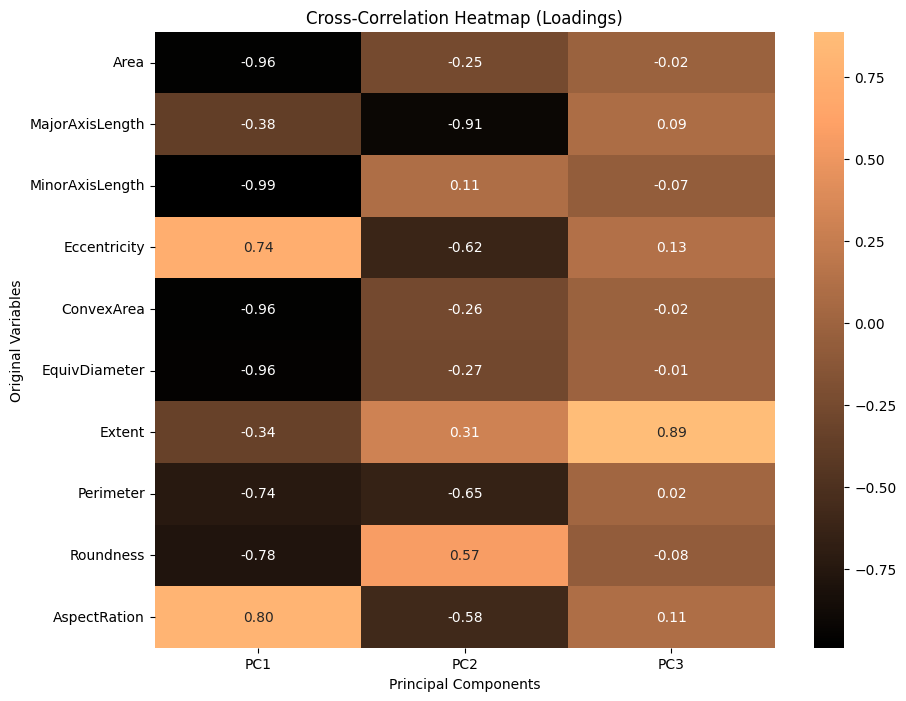

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap="copper", center=0, fmt=".2f")
plt.title("Cross-Correlation Heatmap (Loadings)")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()

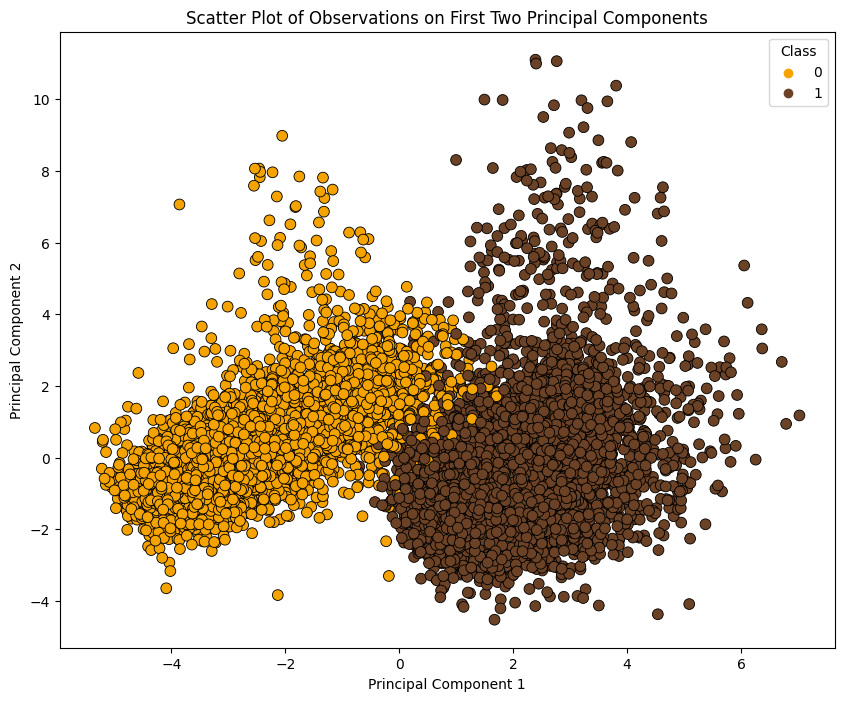

In [62]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=train_pca, palette = {0: '#F4A300', 1: '#6B4226'}, s=60, edgecolor='k')

plt.title("Scatter Plot of Observations on First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class', loc='best')
plt.show()

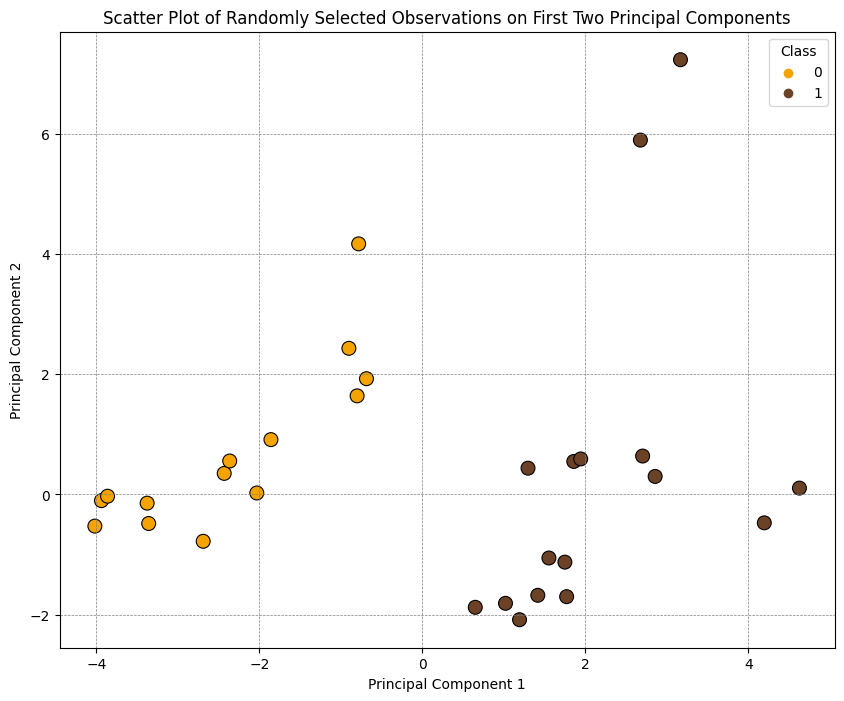

In [63]:
random_sample = train_pca.sample(n=30, random_state=10)

palette = {0: '#F4A300', 1: '#6B4226'} 
plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2', hue='Class', data=random_sample, palette=palette, s=100, edgecolor='k')

plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

plt.title("Scatter Plot of Randomly Selected Observations on First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class', loc='best')
plt.show()

# Clustering 

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(Xtr_pca)
    wcss.append(kmeans.inertia_)

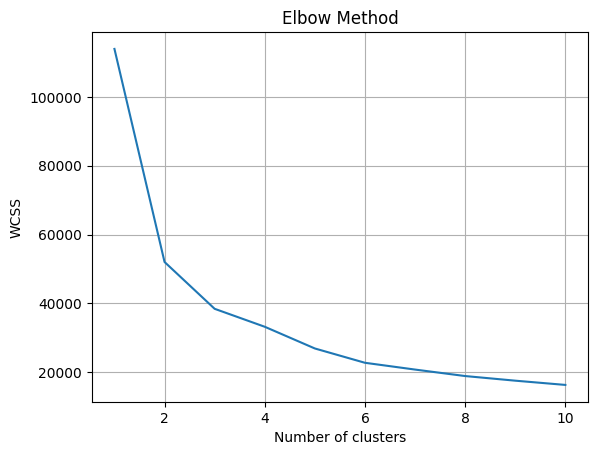

In [66]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [67]:
noise = np.random.normal(0, 0.5, Xtr_pca.shape)  
Xtr_noisy = Xtr_pca + noise

kmeans2 = KMeans(n_clusters=2, random_state=456, n_init=25, algorithm='lloyd')
kmeans2.fit(Xtr_noisy)

zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [-2.67705557  0.29824364 -0.06536584] 
 Cluster 1 : [ 1.97327903 -0.21045336  0.0507693 ] 
 
 Clustering vector: 
 [1 0 1 ... 1 1 1] 
 
 Total Within Cluster Sum of Squares :  
 60467.194918207395 
 Observation numbers : 
 Cluster 0 : 4945 
 Cluster 1 : 6693


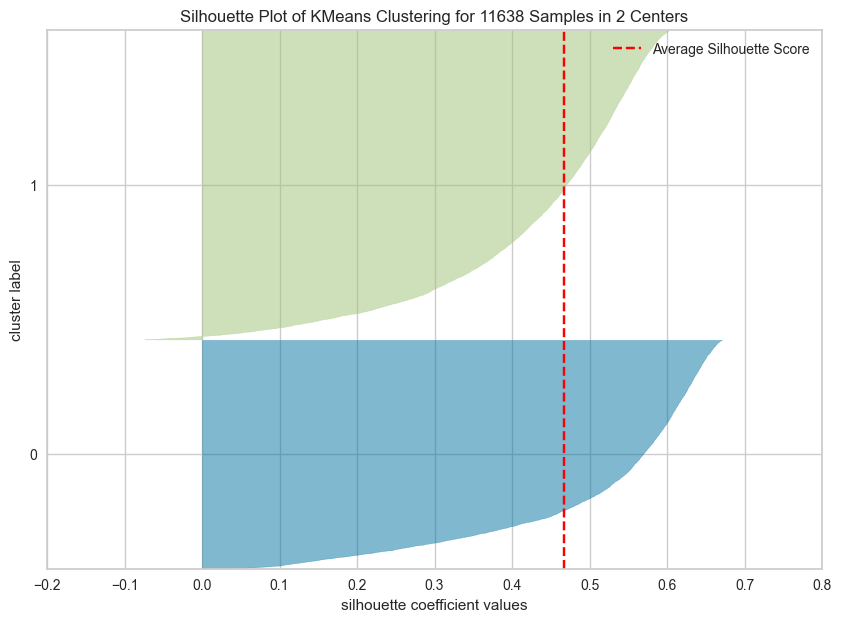

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11638 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=25,
                                      random_state=456))

In [68]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans2, Xtr_noisy, colors='yellowbrick')

# Logistic Regression 

In [69]:
logi_model = LogisticRegression(penalty='l2',solver='liblinear',random_state = 10,multi_class='ovr')

In [70]:
param_grid_logi = {'solver': ['lbfgs', 'newton-cg','sag','saga'],'penalty':['None','l2','l1']}

In [71]:
grid_search_logi = GridSearchCV(estimator=logi_model, param_grid=param_grid_logi, cv=5, scoring='accuracy')

In [72]:
grid_search_logi.fit(Xtr_pca,Ys_train)

E:\applications\py\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


35 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "E:\applications\py\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\applications\py\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "E:\applications\py\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\applications\py\lib\site-packages\sklearn\utils\_param_validati

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', random_state=10,
                                          solver='liblinear'),
             param_grid={'penalty': ['None', 'l2', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [73]:
best_params_logi = grid_search_logi.best_params_
best_params_logi

{'penalty': 'l2', 'solver': 'lbfgs'}

In [74]:
best_logi_model = grid_search_logi.best_estimator_
best_logi_model

LogisticRegression(multi_class='ovr', random_state=10)

In [75]:
y_pred_logi = best_logi_model.predict(Xte_pca)

In [76]:
Accuracy_logi= accuracy_score(Ys_test, y_pred_logi)
Accuracy_logi

0.9869415807560138

In [77]:
y_train_pred_logi = best_logi_model.predict(Xtr_pca)
Accuracy_train_logi = accuracy_score(Ys_train, y_train_pred_logi)
print("Training Set Accuracy:", Accuracy_train_logi)

Training Set Accuracy: 0.986681560405568


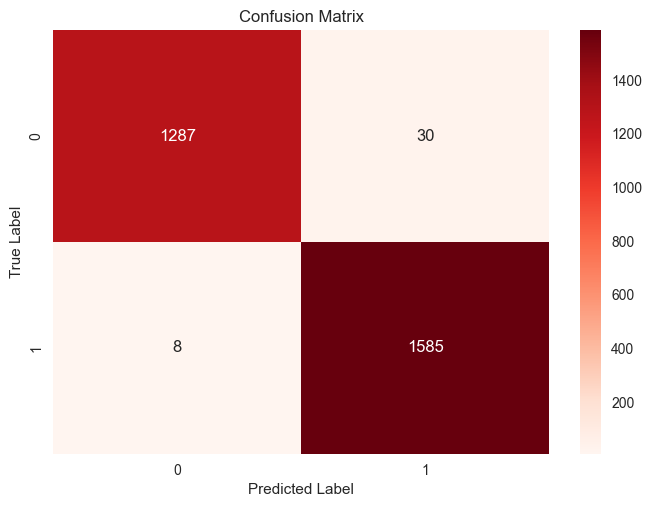

In [78]:
class_labels = ['0', '1']
conf_matrix_logi = confusion_matrix(Ys_test, y_pred_logi)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [79]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_train_pred_logi)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_logi)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5200
           1       0.98      0.99      0.99      6438

    accuracy                           0.99     11638
   macro avg       0.99      0.99      0.99     11638
weighted avg       0.99      0.99      0.99     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1317
           1       0.98      0.99      0.99      1593

    accuracy                           0.99      2910
   macro avg       0.99      0.99      0.99      2910
weighted avg       0.99      0.99      0.99      2910



# XG Boost 

In [80]:
xgb_model = xgb.XGBClassifier(random_state=10,booster='dart',alpha=5,gamma=1,sample_type='uniform',normalize_type='forest',rate_drop=0.1)

In [81]:
param_grid_xgb = {'learning_rate': [0.05, 0.1] ,'max_depth': [2, 3],'n_estimators': [50, 100],'lambda':[2.5,3],'subsample': [0.7, 0.8],'colsample_bytree': [0.7, 0.8]}

In [82]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_log_loss',n_jobs=-1)

In [83]:
grid_search_xgb.fit(Xtr_pca ,Ys_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(alpha=5, base_score=None, booster='dart',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=1, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     normalize_type='forest',
                                     num_parallel_tree=None, predictor=None,
                                     random_state=10, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'lambda': [2.5, 3],
                         'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'n_estimators': [50, 100], 'subsample': [0.7, 0.8]},
             scoring='neg_log_loss')

In [84]:
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb

{'colsample_bytree': 0.7,
 'lambda': 2.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [85]:
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model

XGBClassifier(alpha=5, base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=2.5,
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, normalize_type='forest', num_parallel_tree=1,
              predictor='auto', ...)

In [86]:
y_pred_xgb = best_xgb_model.predict(Xte_pca)

In [87]:
Accuracy_xgb = accuracy_score(Ys_test, y_pred_xgb)
Accuracy_xgb

0.9876288659793815

In [88]:
y_train_pred_xgb = best_xgb_model.predict(Xtr_pca)
Accuracy_train_xgb = accuracy_score(Ys_train, y_train_pred_xgb)
print("Training Set Accuracy:", Accuracy_train_xgb)

Training Set Accuracy: 0.9902045024918371


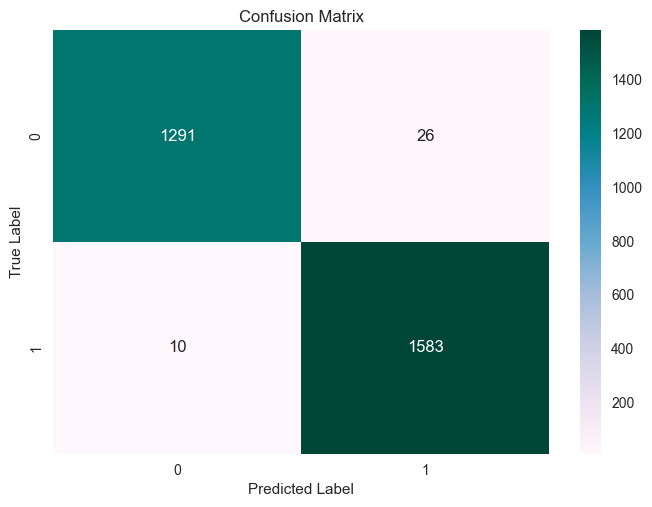

In [89]:
class_labels = ['0', '1']
conf_matrix_logi = confusion_matrix(Ys_test, y_pred_xgb)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='PuBuGn', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [90]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_train_pred_xgb)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_xgb)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5200
           1       0.99      0.99      0.99      6438

    accuracy                           0.99     11638
   macro avg       0.99      0.99      0.99     11638
weighted avg       0.99      0.99      0.99     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1317
           1       0.98      0.99      0.99      1593

    accuracy                           0.99      2910
   macro avg       0.99      0.99      0.99      2910
weighted avg       0.99      0.99      0.99      2910



# Random Forest 

In [91]:
rf_model = RandomForestClassifier(random_state=10)

In [92]:
param_grid_rf = {'criterion': ['gini','entropy'] ,'n_estimators': [25,35,45],'max_depth': [2,3,4]} 

In [93]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

In [94]:
grid_search_rf.fit(Xtr_pca ,Ys_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'n_estimators': [25, 35, 45]},
             scoring='accuracy')

In [95]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 35}

In [96]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=4, n_estimators=35, random_state=10)

In [97]:
y_pred_rf = best_rf_model.predict(Xte_pca)
Accuracy_rf = accuracy_score(Ys_test, y_pred_rf)
Accuracy_rf

0.9831615120274914

In [98]:
y_train_pred_rf = best_rf_model.predict(Xtr_pca)
Accuracy_train_rf = accuracy_score(Ys_train, y_train_pred_rf)
print("Training Set Accuracy:", Accuracy_train_rf)

Training Set Accuracy: 0.9849630520708026


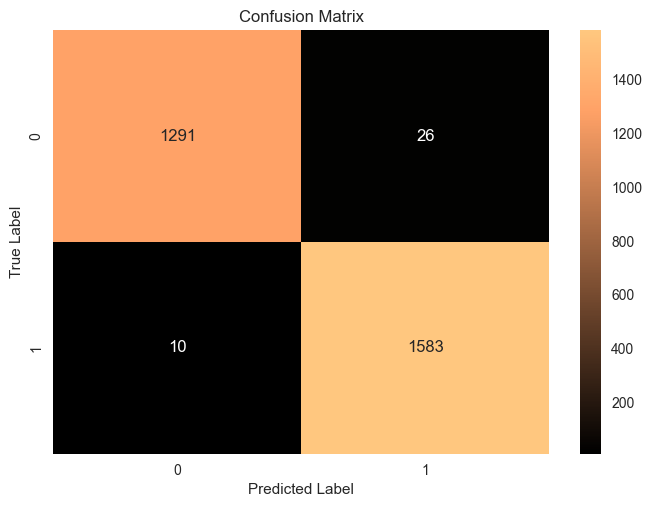

In [99]:
class_labels = ['0', '1']
conf_matrix_rf = confusion_matrix(Ys_test, y_pred_rf)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='copper', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [100]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_train_pred_rf)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_rf)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5200
           1       0.98      0.99      0.99      6438

    accuracy                           0.98     11638
   macro avg       0.99      0.98      0.98     11638
weighted avg       0.99      0.98      0.98     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1317
           1       0.98      0.99      0.98      1593

    accuracy                           0.98      2910
   macro avg       0.98      0.98      0.98      2910
weighted avg       0.98      0.98      0.98      2910



# SVM 

## Kernal = Polynomial

In [101]:
param_grid_svm_K = {'C': [1,1.5,2,2.5,3,3.5],'gamma':['scale','auto',0.01,0.1],'decision_function_shape':['ovo','ovr']} 

In [102]:
svm_polyK_model = SVC(random_state=10,probability=True,kernel='poly')

In [103]:
grid_search_svm_polyK = GridSearchCV(estimator=svm_polyK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=3, n_jobs=-1)

In [104]:
grid_search_svm_polyK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=3,
             estimator=SVC(kernel='poly', probability=True, random_state=10),
             n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [105]:
best_svm_polyK_model = grid_search_svm_polyK.best_estimator_
best_svm_polyK_model

SVC(C=3, decision_function_shape='ovo', gamma='auto', kernel='poly',
    probability=True, random_state=10)

In [106]:
y_pred_svm_polyK = best_svm_polyK_model.predict(Xte_pca)

In [107]:
Accuracy_svm_polyK= accuracy_score(Ys_test, y_pred_svm_polyK)
Accuracy_svm_polyK

0.9862542955326461

In [108]:
y_pred_svm_polyK_train = best_svm_polyK_model.predict(Xtr_pca)
Accuracy_svm_polyK_train = accuracy_score(Ys_train, y_pred_svm_polyK_train)
Accuracy_svm_polyK_train

0.9865956349888297

## Kernal = RBF

In [109]:
svm_rbfK_model = SVC(random_state=10,probability=True,kernel='rbf')

In [110]:
grid_search_svm_rbfK = GridSearchCV(estimator=svm_rbfK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=5, n_jobs=-1)

In [111]:
grid_search_svm_rbfK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=10), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [112]:
best_svm_rbfK_model = grid_search_svm_rbfK.best_estimator_
best_svm_rbfK_model

SVC(C=3.5, decision_function_shape='ovo', gamma='auto', probability=True,
    random_state=10)

In [113]:
y_pred_svm_rbfK = best_svm_rbfK_model.predict(Xte_pca)
Accuracy_svm_rbfK= accuracy_score(Ys_test, y_pred_svm_rbfK)
Accuracy_svm_rbfK

0.9903780068728523

In [114]:
y_pred_svm_rbfK_train = best_svm_rbfK_model.predict(Xtr_pca)
Accuracy_svm_rbfK_train = accuracy_score(Ys_train, y_pred_svm_rbfK_train)
Accuracy_svm_rbfK_train

0.9905482041587902

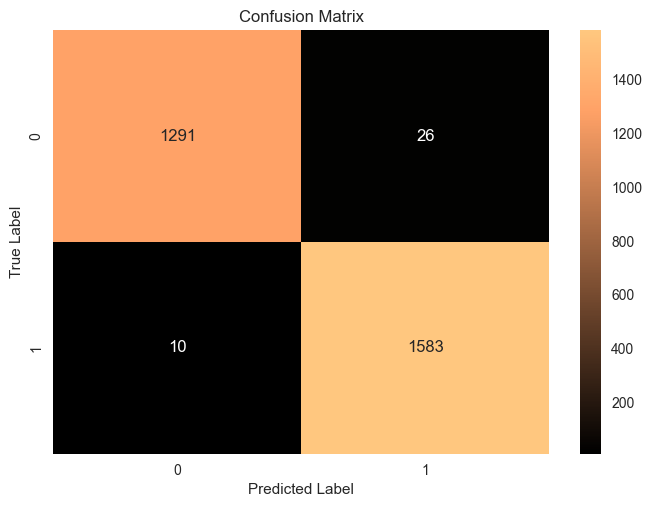

In [115]:
class_labels = ['0', '1']
conf_matrix_rf = confusion_matrix(Ys_test, y_pred_svm_rbfK)
sns.heatmap(conf_matrix_logi, annot=True, fmt='d', cmap='copper', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [116]:
print(f"Classification Report for Training Set:\n{classification_report(Ys_train, y_pred_svm_rbfK_train)}\n\nClassification Report for Test Set:\n{classification_report(Ys_test, y_pred_svm_rbfK)}")

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5200
           1       0.99      0.99      0.99      6438

    accuracy                           0.99     11638
   macro avg       0.99      0.99      0.99     11638
weighted avg       0.99      0.99      0.99     11638


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1317
           1       0.99      0.99      0.99      1593

    accuracy                           0.99      2910
   macro avg       0.99      0.99      0.99      2910
weighted avg       0.99      0.99      0.99      2910



## Kernal = Sigmoid

In [117]:
svm_sigK_model = SVC(random_state=10,probability=True,kernel='sigmoid')

In [118]:
grid_search_svm_sigK = GridSearchCV(estimator=svm_sigK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=5, n_jobs=-1)

In [119]:
grid_search_svm_sigK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=5,
             estimator=SVC(kernel='sigmoid', probability=True, random_state=10),
             n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [120]:
best_svm_sigK_model = grid_search_svm_sigK.best_estimator_
best_svm_sigK_model

SVC(C=1, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid',
    probability=True, random_state=10)

In [121]:
y_pred_svm_sigK = best_svm_sigK_model.predict(Xte_pca)
Accuracy_svm_sigK= accuracy_score(Ys_test, y_pred_svm_sigK)
Accuracy_svm_sigK

0.9783505154639175

In [122]:
y_pred_svm_sigK_train = best_svm_sigK_model.predict(Xtr_pca)
Accuracy_svm_sigK_train = accuracy_score(Ys_train, y_pred_svm_sigK_train)
Accuracy_svm_sigK_train

0.9774875408145729

## Kernal = linear

In [123]:
svm_lK_model = SVC(random_state=10,probability=True,kernel='linear')

In [124]:
grid_search_svm_lK = GridSearchCV(estimator=svm_lK_model , param_grid=param_grid_svm_K, scoring='accuracy', cv=5, n_jobs=-1)

In [125]:
grid_search_svm_lK.fit(Xtr_pca,Ys_train)

GridSearchCV(cv=5,
             estimator=SVC(kernel='linear', probability=True, random_state=10),
             n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 3.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.01, 0.1]},
             scoring='accuracy')

In [126]:
best_svm_lK_model = grid_search_svm_lK.best_estimator_
best_svm_lK_model

SVC(C=1, decision_function_shape='ovo', kernel='linear', probability=True,
    random_state=10)

In [127]:
y_pred_svm_lK = best_svm_lK_model.predict(Xte_pca)
Accuracy_svm_lK= accuracy_score(Ys_test, y_pred_svm_lK)
Accuracy_svm_lK

0.98659793814433

In [128]:
y_pred_svm_lK_train = best_svm_lK_model.predict(Xtr_pca)
Accuracy_svm_lK_train = accuracy_score(Ys_train, y_pred_svm_lK_train)
Accuracy_svm_lK_train

0.9868534112390445

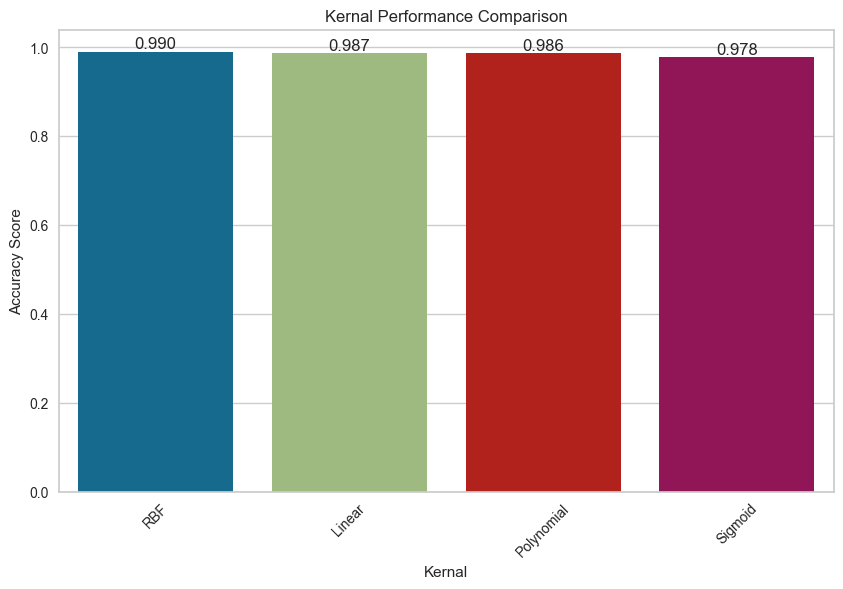

In [129]:
result_svm = pd.DataFrame({
    'Kernal': ['Linear', 'Polynomial','RBF','Sigmoid'],
    'Score': [Accuracy_svm_lK, Accuracy_svm_polyK,Accuracy_svm_rbfK,Accuracy_svm_sigK]
})
result_svm

result_svm.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Kernal', y='Score', data=result_svm, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result_svm.Kernal, rotation=45)
plt.title('Kernal Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

# Model Performance Comparisson

In [130]:
result = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression','XGBoostClassifier','SVM'],
    'Score': [Accuracy_rf,Accuracy_logi,Accuracy_xgb,Accuracy_svm_rbfK]
})
result

Algorithm     Score
0  RandomForestClassifier  0.983162
1      LogisticRegression  0.986942
2       XGBoostClassifier  0.987629
3                     SVM  0.990378

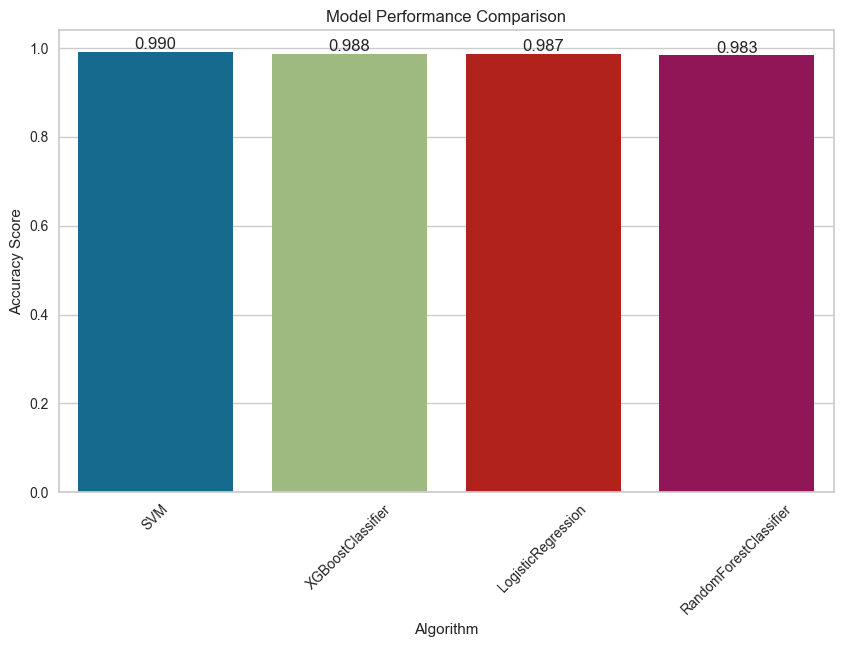

In [131]:
result.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

# Web Product

In [143]:
Xp = np.array([[8489, 151.655045, 72.418507, 0.878620, 8728, 103.964083, 0.589678, 375.653, 0.755949, 2.094148]]) 
Xp_transformed = pca.transform(Xp)
y_pred = best_svm_rbfK_model.predict(Xp_transformed)
y_pred

E:\applications\py\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



array([1], dtype=int64)

In [132]:
import pickle

In [133]:
data = {
    "model": best_svm_rbfK_model,  # Your best SVM model
    "pca": pca  # Your trained PCA transformer
}

In [134]:
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

print("Model and PCA transformation saved successfully.")

Model and PCA transformation saved successfully.


In [141]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

model = data["model"]  # The trained model
pca = data["pca"]  # The trained PCA transformer

# Example new data point
X_new = np.array([[8489, 151.655045, 72.418507, 0.878620, 8728, 103.964083, 0.589678, 375.653, 0.755949, 2.094148]])  # Replace this with your new data

# Apply the PCA transformation to the new data
X_new_transformed = pca.transform(X_new)

# Make a prediction with the trained model
prediction = model.predict(X_new_transformed)

# Map prediction to class names
class_names = {0: 'Gonen', 1: 'Jasmine'}
predicted_class = class_names[prediction[0]]

print(f"Prediction: {predicted_class}")

Prediction: Jasmine


E:\applications\py\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

